In [1]:
%load_ext autoreload
%autoreload 2

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import (classification_report,
                             precision_recall_fscore_support)

from utils.constants import STAGE_DIR, ANALYSIS_DIR
from utils.dataload import load_data
from utils.functions import split_train_test
from utils.plots import plot_features_scores
from utils.transformers import SequentialFeatureSelectorTransformer

# Configuration

In [3]:
RUN_WRAPPER_SELECTION = True
RESAMPLED = True

SUFIX = '_resampled' if RESAMPLED else ''

# Load data

In [4]:
# Load all dataset
X_all = load_data(
    STAGE_DIR / 'preprocess' / f'X_train{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using univariate analysis
X_mi = load_data(
    STAGE_DIR / 'selection' / f'X_train_mi{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

X_x2 = load_data(
    STAGE_DIR / 'selection' / f'X_train_x2{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

X_anova = load_data(
    STAGE_DIR / 'selection' / f'X_train_anova{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using multivariate analysis
X_relief = load_data(
    STAGE_DIR / 'selection' / f'X_train_relief{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

In [5]:
y = load_data(
    STAGE_DIR / 'preprocess' / f'y{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

In [6]:
X_train_all, X_test_all, y_train_all, y_test_all = split_train_test(X_all, y)
X_train_mi, X_test_mi, y_train_mi, y_test_mi = split_train_test(X_mi, y)
X_train_x2, X_test_x2, y_train_x2, y_test_x2 = split_train_test(X_x2, y)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = split_train_test(X_anova, y)
X_train_relief, X_test_relief, y_train_relief, y_test_relief = split_train_test(X_relief, y)

# Logistic Regression

In [7]:
lr_parameters = {
    'max_iter': 1000
}

## All features

### Training and score in the sample (81% - 0.01 std)

In [8]:
lr_all = LogisticRegression(**lr_parameters)
lr_all_scores = cross_val_score(
    lr_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_all_scores.mean(),
    lr_all_scores.std())
)

0.77 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [9]:
lr_all = LogisticRegression(
    **lr_parameters
).fit(X_train_all, y_train_all['y'])
y_test_predict_all = lr_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       580
           1       0.74      0.82      0.78       580

    accuracy                           0.76      1160
   macro avg       0.77      0.76      0.76      1160
weighted avg       0.77      0.76      0.76      1160



### Feature Importances

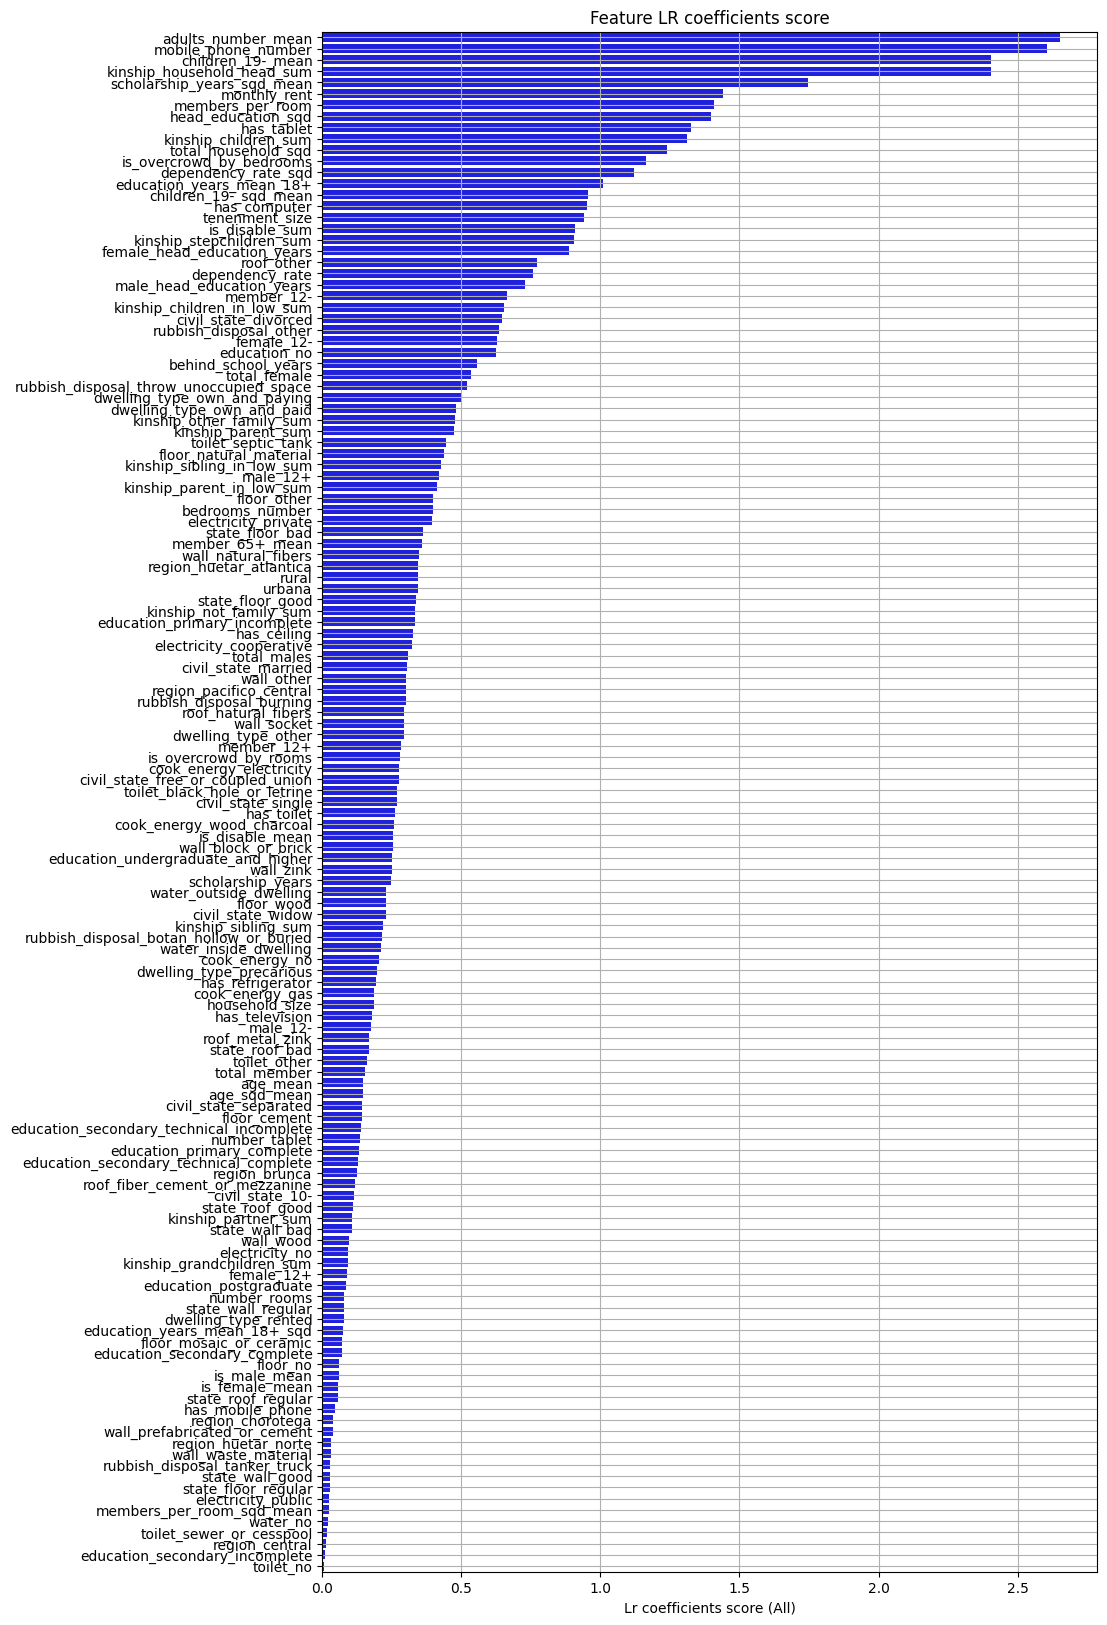

In [10]:
plot_features_scores(
    X_train_all,
    np.abs(lr_all.coef_[0]),
    method='LR coefficients',
    metric_label='All'
)

In [11]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_all{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Univariate - Mutual Information

### Training and score in the sample (81% - 0.01 std)

In [12]:
lr_mi = LogisticRegression(**lr_parameters)
lr_mi_scores = cross_val_score(
    lr_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_mi_scores.mean(),
    lr_mi_scores.std())
)

0.77 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [13]:
lr_mi = LogisticRegression(
    **lr_parameters
).fit(X_train_mi, y_train_mi['y'])
y_test_predict_mi = lr_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_mi))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       588
           1       0.74      0.80      0.77       572

    accuracy                           0.76      1160
   macro avg       0.76      0.76      0.76      1160
weighted avg       0.76      0.76      0.76      1160



### Feature Importances

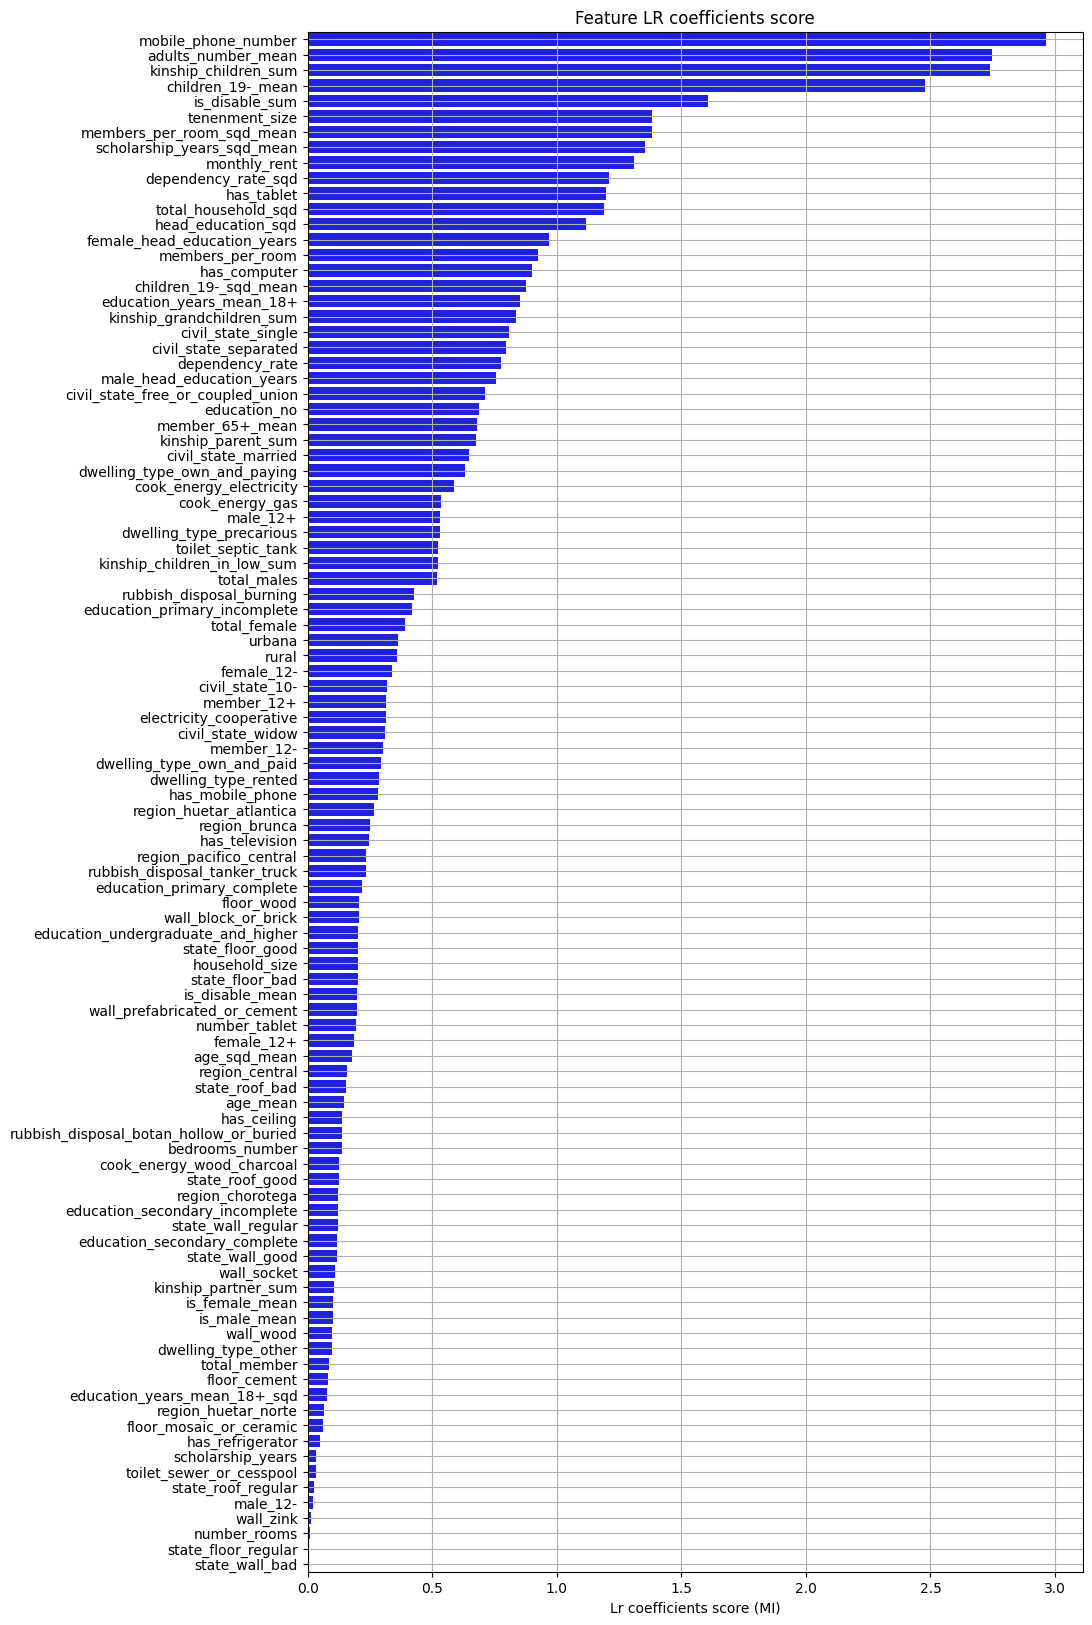

In [14]:
plot_features_scores(
    X_train_mi,
    np.abs(lr_mi.coef_[0]),
    method='LR coefficients',
    metric_label='MI'
)

In [15]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_mi{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Univariate - $\chi^2$

### Training and score in the sample (79% - 0.01 std)

In [16]:
lr_x2 = LogisticRegression(**lr_parameters)
lr_x2_scores = cross_val_score(
    lr_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_x2_scores.mean(),
    lr_x2_scores.std())
)

0.73 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [17]:
lr_x2 = LogisticRegression(
    **lr_parameters
).fit(X_train_x2, y_train_x2['y'])
y_test_predict_x2 = lr_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_x2))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       598
           1       0.74      0.82      0.78       562

    accuracy                           0.77      1160
   macro avg       0.77      0.77      0.77      1160
weighted avg       0.77      0.77      0.77      1160



### Feature Importances

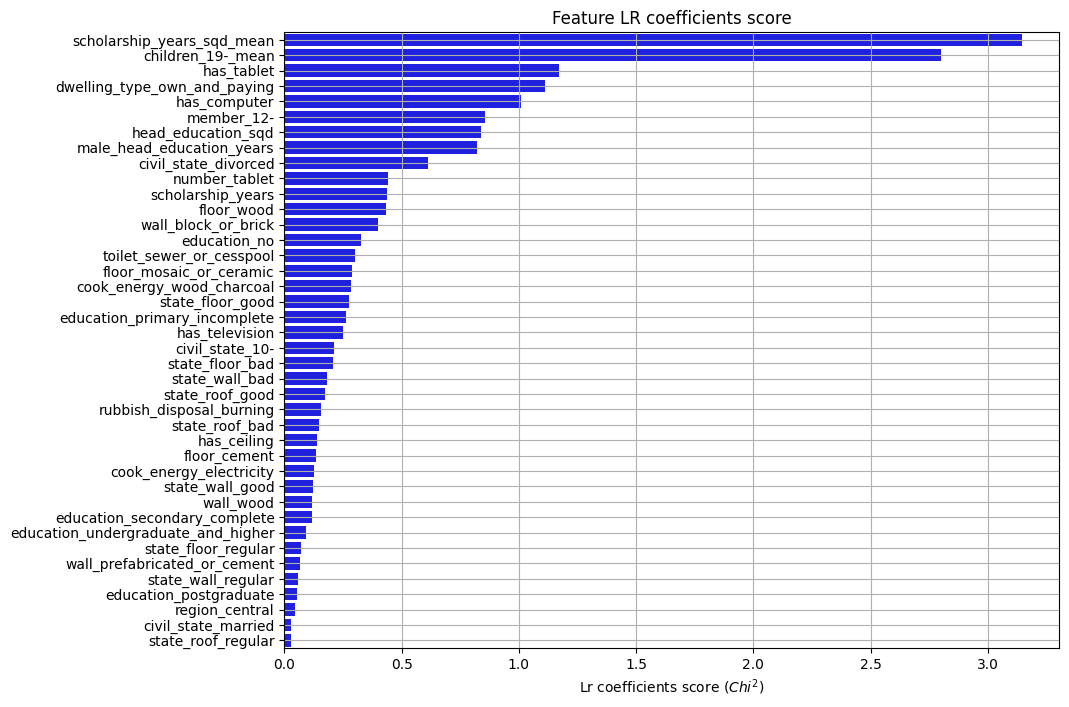

In [18]:
plot_features_scores(
    X_train_x2,
    np.abs(lr_x2.coef_[0]),
    method='LR coefficients',
    metric_label=r'$Chi^2$',
    figsize=(10, 8)
)

In [19]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_x2{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Univariate - ANOVA

### Training and score in the sample (81% - 0.01 std)

In [20]:
lr_anova = LogisticRegression(**lr_parameters)
lr_anova_scores = cross_val_score(
    lr_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_anova_scores.mean(),
    lr_anova_scores.std())
)

0.77 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [21]:
lr_anova = LogisticRegression(
    **lr_parameters
).fit(X_train_anova, y_train_anova['y'])
y_test_predict_anova = lr_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_anova))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       531
           1       0.78      0.82      0.80       629

    accuracy                           0.78      1160
   macro avg       0.78      0.77      0.77      1160
weighted avg       0.78      0.78      0.78      1160



### Feature Importances

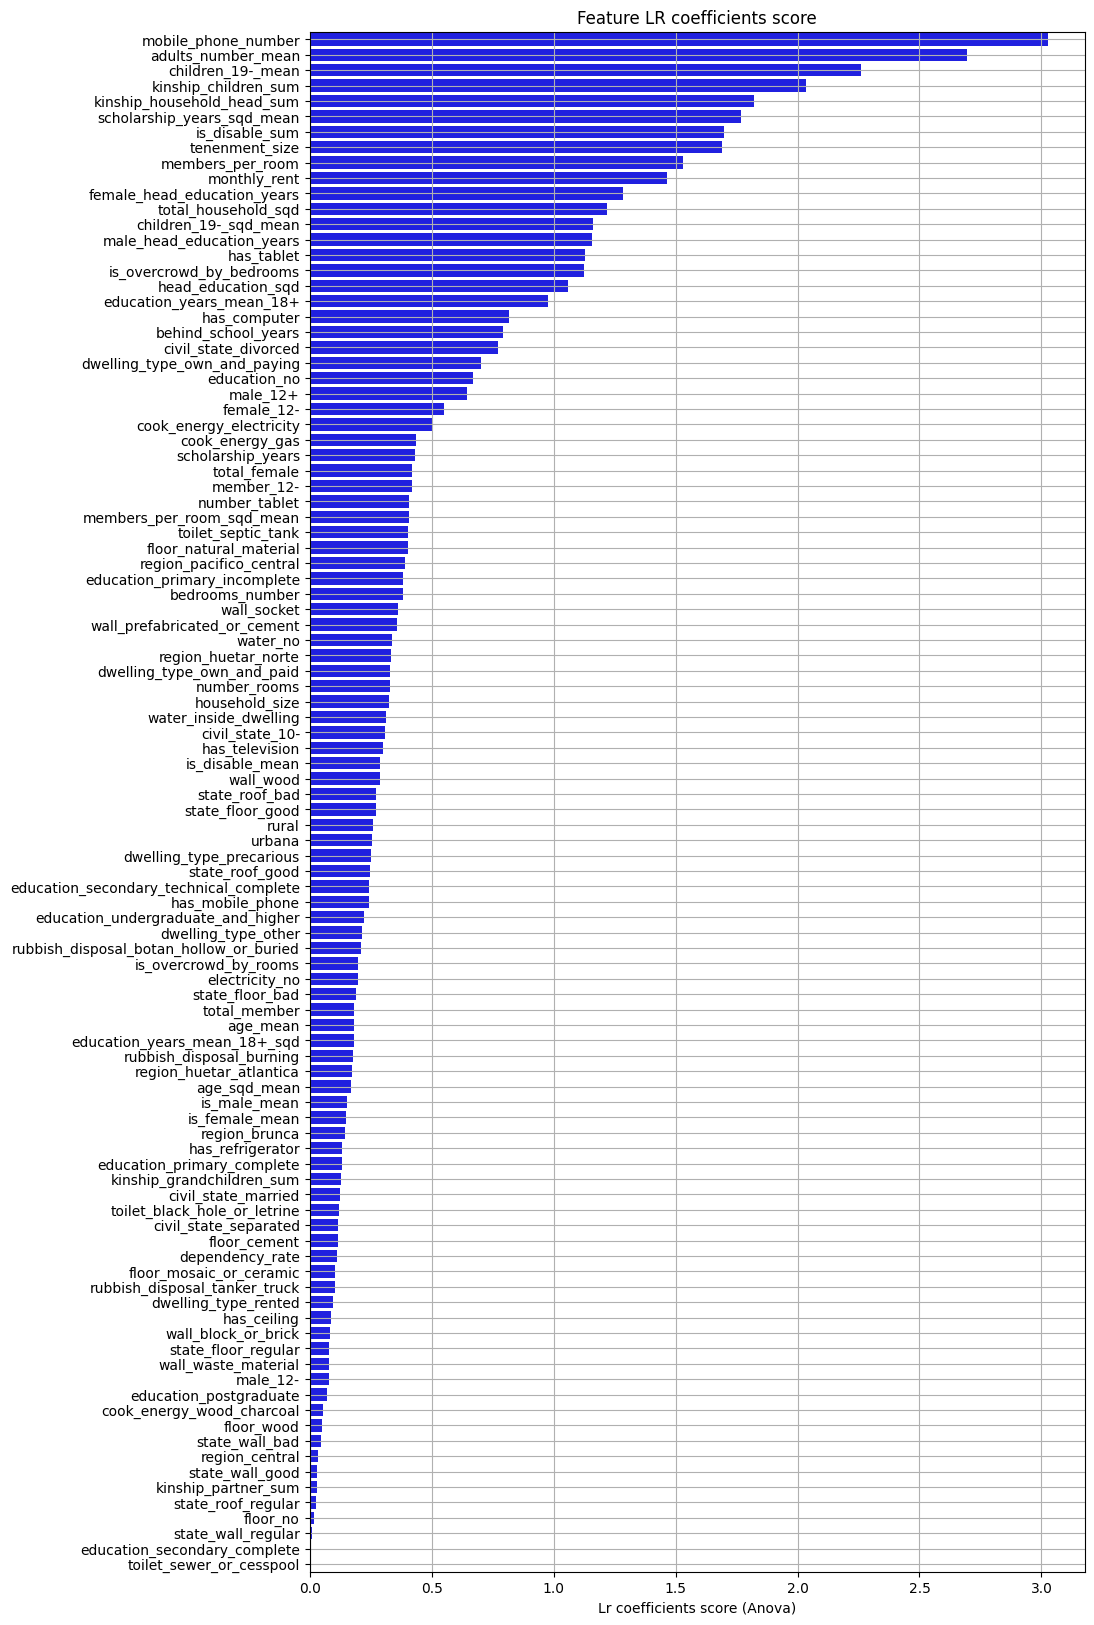

In [22]:
plot_features_scores(
    X_train_anova,
    np.abs(lr_anova.coef_[0]),
    method='LR coefficients',
    metric_label='Anova'
)

In [23]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_anova{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Multivariate - Relief

### Training and score in the sample (79% - 0.02 std)

In [24]:
lr_relief = LogisticRegression(**lr_parameters)
lr_relief_scores = cross_val_score(
    lr_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_relief_scores.mean(),
    lr_relief_scores.std())
)

0.73 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [25]:
lr_relief = LogisticRegression(
    **lr_parameters
).fit(X_train_relief, y_train_relief['y'])
y_test_predict_relief = lr_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_relief))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       584
           1       0.73      0.76      0.75       576

    accuracy                           0.74      1160
   macro avg       0.74      0.74      0.74      1160
weighted avg       0.74      0.74      0.74      1160



### Feature Importances

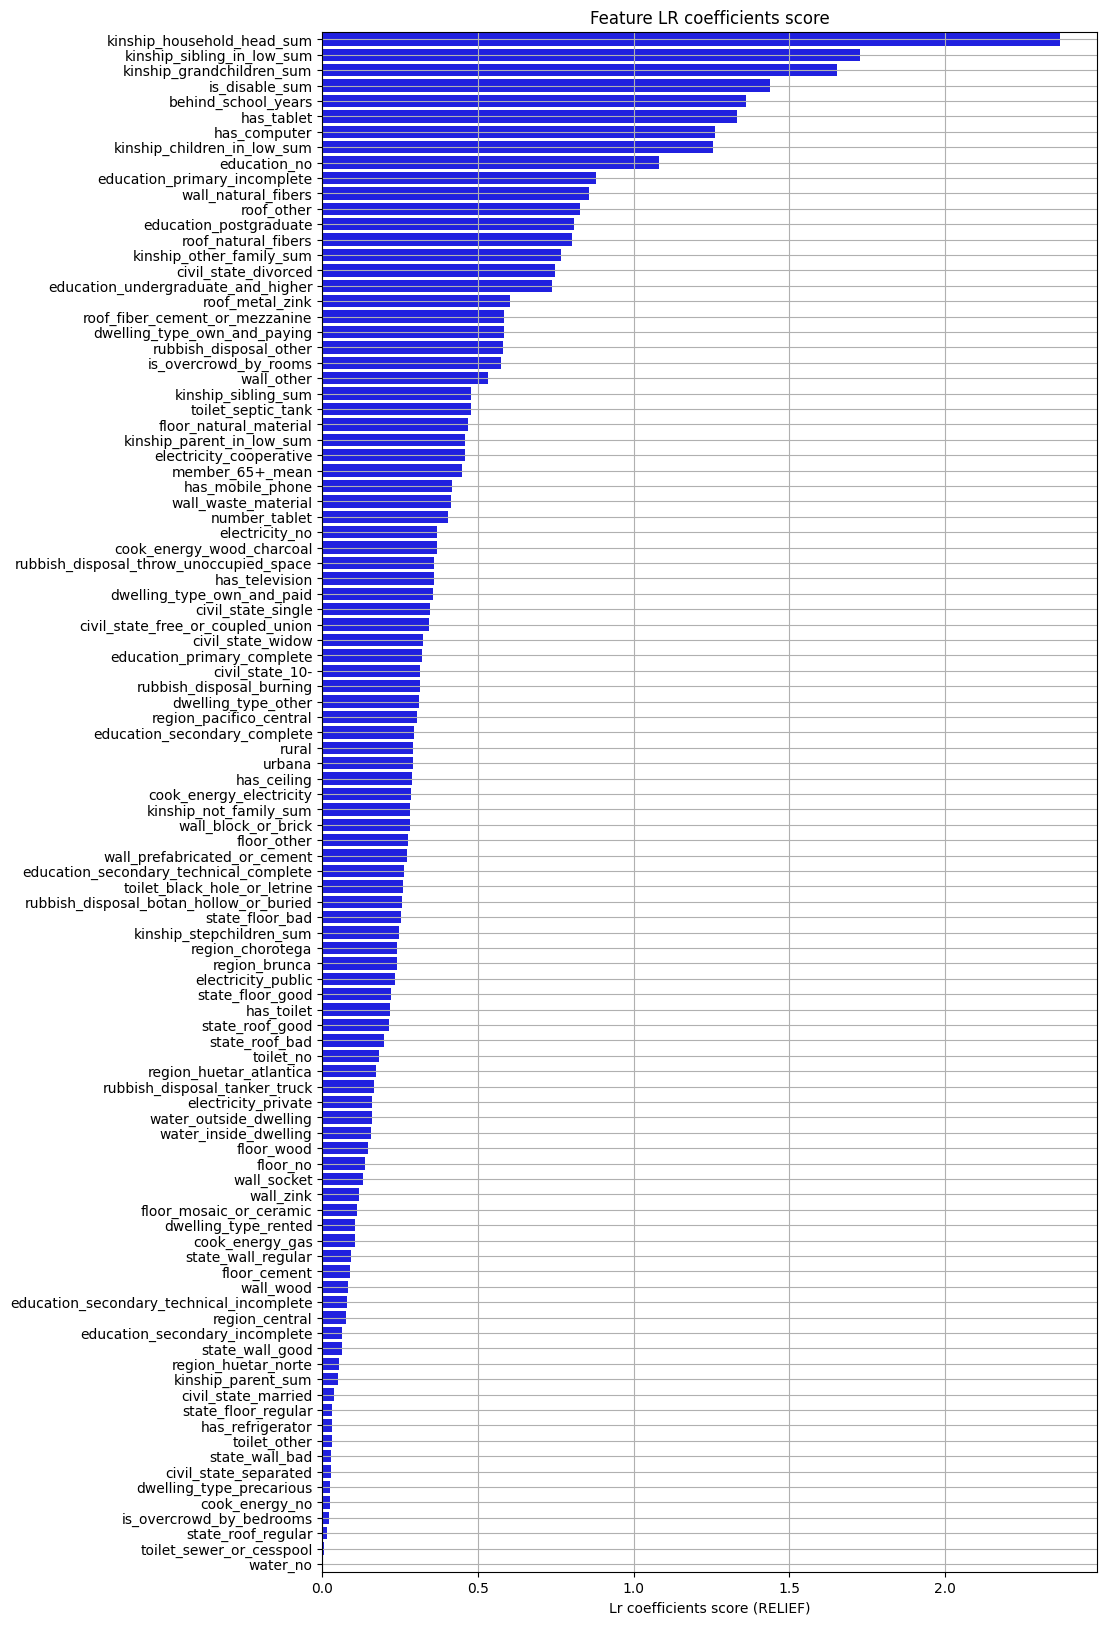

In [26]:
plot_features_scores(
    X_train_relief,
    np.abs(lr_relief.coef_[0]),
    method='LR coefficients',
    metric_label='RELIEF'
)

In [27]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_relief{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Wrapper

### Select features

In [28]:
if RUN_WRAPPER_SELECTION:
    lr_wrapper = LogisticRegression(**lr_parameters)

    lr_fs_wrapper = SequentialFeatureSelectorTransformer(
        lr_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_lr_wrapper = lr_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_lr_wrapper, X_test_lr_wrapper, y_train_lr_wrapper, y_test_lr_wrapper = split_train_test(X_lr_wrapper, y)

    X_lr_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_lr.parquet')

Fitting model. This may take a while...
We have a winner!


### Training and score in the sample (81% - 0.01 std)

In [29]:
if not RUN_WRAPPER_SELECTION:
    X_lr_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_lr.parquet')
    X_train_lr_wrapper, X_test_lr_wrapper, y_train_lr_wrapper, y_test_lr_wrapper = split_train_test(X_lr_wrapper, y)

In [30]:
lr_wrapper = LogisticRegression(**lr_parameters)
lr_wrapper_scores = cross_val_score(
    lr_wrapper,
    X_train_lr_wrapper,
    y_train_lr_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_wrapper_scores.mean(),
    lr_wrapper_scores.std())
)

0.75 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [31]:
lr_wrapper = LogisticRegression().fit(X_train_lr_wrapper, y_train_lr_wrapper['y'])
y_test_predict_lr_wrapper = lr_wrapper.predict(X_test_lr_wrapper)

print(classification_report(y_test_lr_wrapper['y'], y_test_predict_lr_wrapper))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       574
           1       0.71      0.86      0.78       586

    accuracy                           0.75      1160
   macro avg       0.76      0.75      0.75      1160
weighted avg       0.76      0.75      0.75      1160



c:\Users\gabya\anaconda3\envs\project-ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Feature Importances

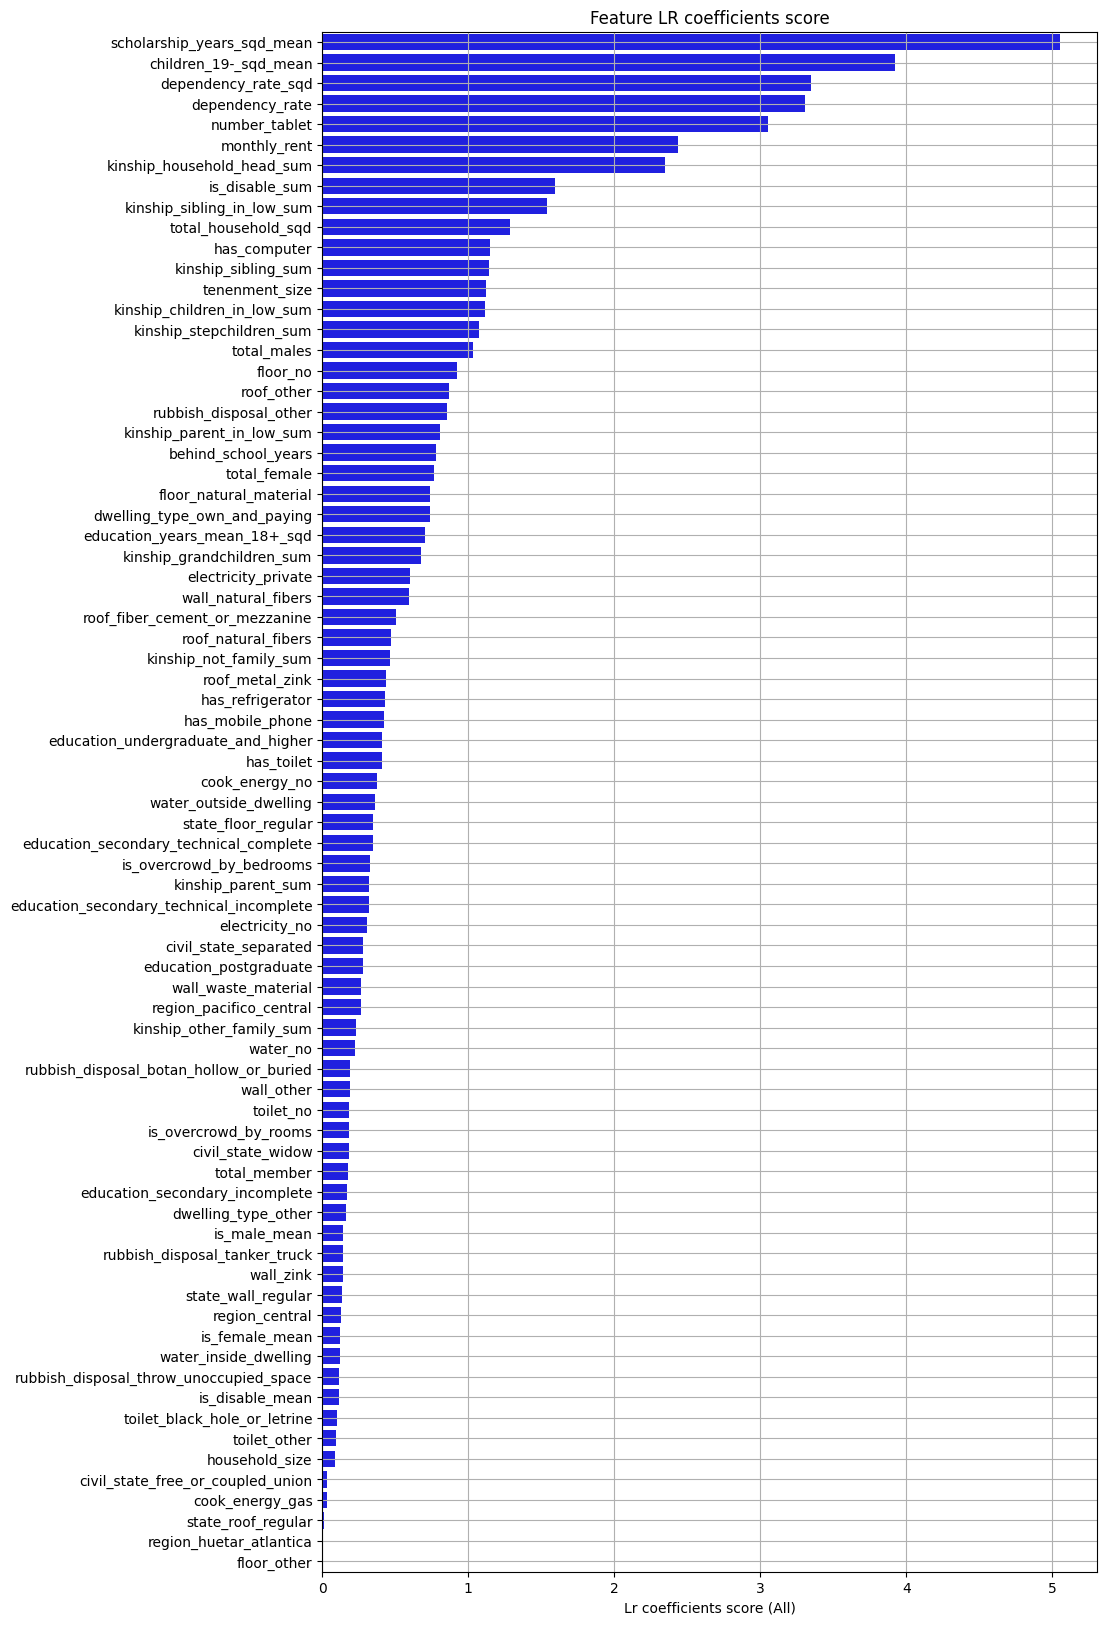

In [32]:
plot_features_scores(
    X_train_lr_wrapper,
    np.abs(lr_wrapper.coef_[0]),
    method='LR coefficients',
    metric_label='All'
)

In [33]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr_wrapper{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Metaclassifier - Bagging

### Training and score in the sample (81% - 0.01 std)

In [34]:
lr_bagging = BaggingClassifier(
    LogisticRegression(**lr_parameters)
)
lr_bagging_scores = cross_val_score(
    lr_bagging,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    lr_bagging_scores.mean(),
    lr_bagging_scores.std())
)

0.77 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [35]:
lr_bagging = BaggingClassifier(
    LogisticRegression(**lr_parameters)
).fit(X_train_all, y_train_all['y'])
y_test_predict_lr_bagging = lr_bagging.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_lr_bagging))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       580
           1       0.74      0.82      0.78       580

    accuracy                           0.77      1160
   macro avg       0.77      0.77      0.77      1160
weighted avg       0.77      0.77      0.77      1160



## Feature selection (summary)

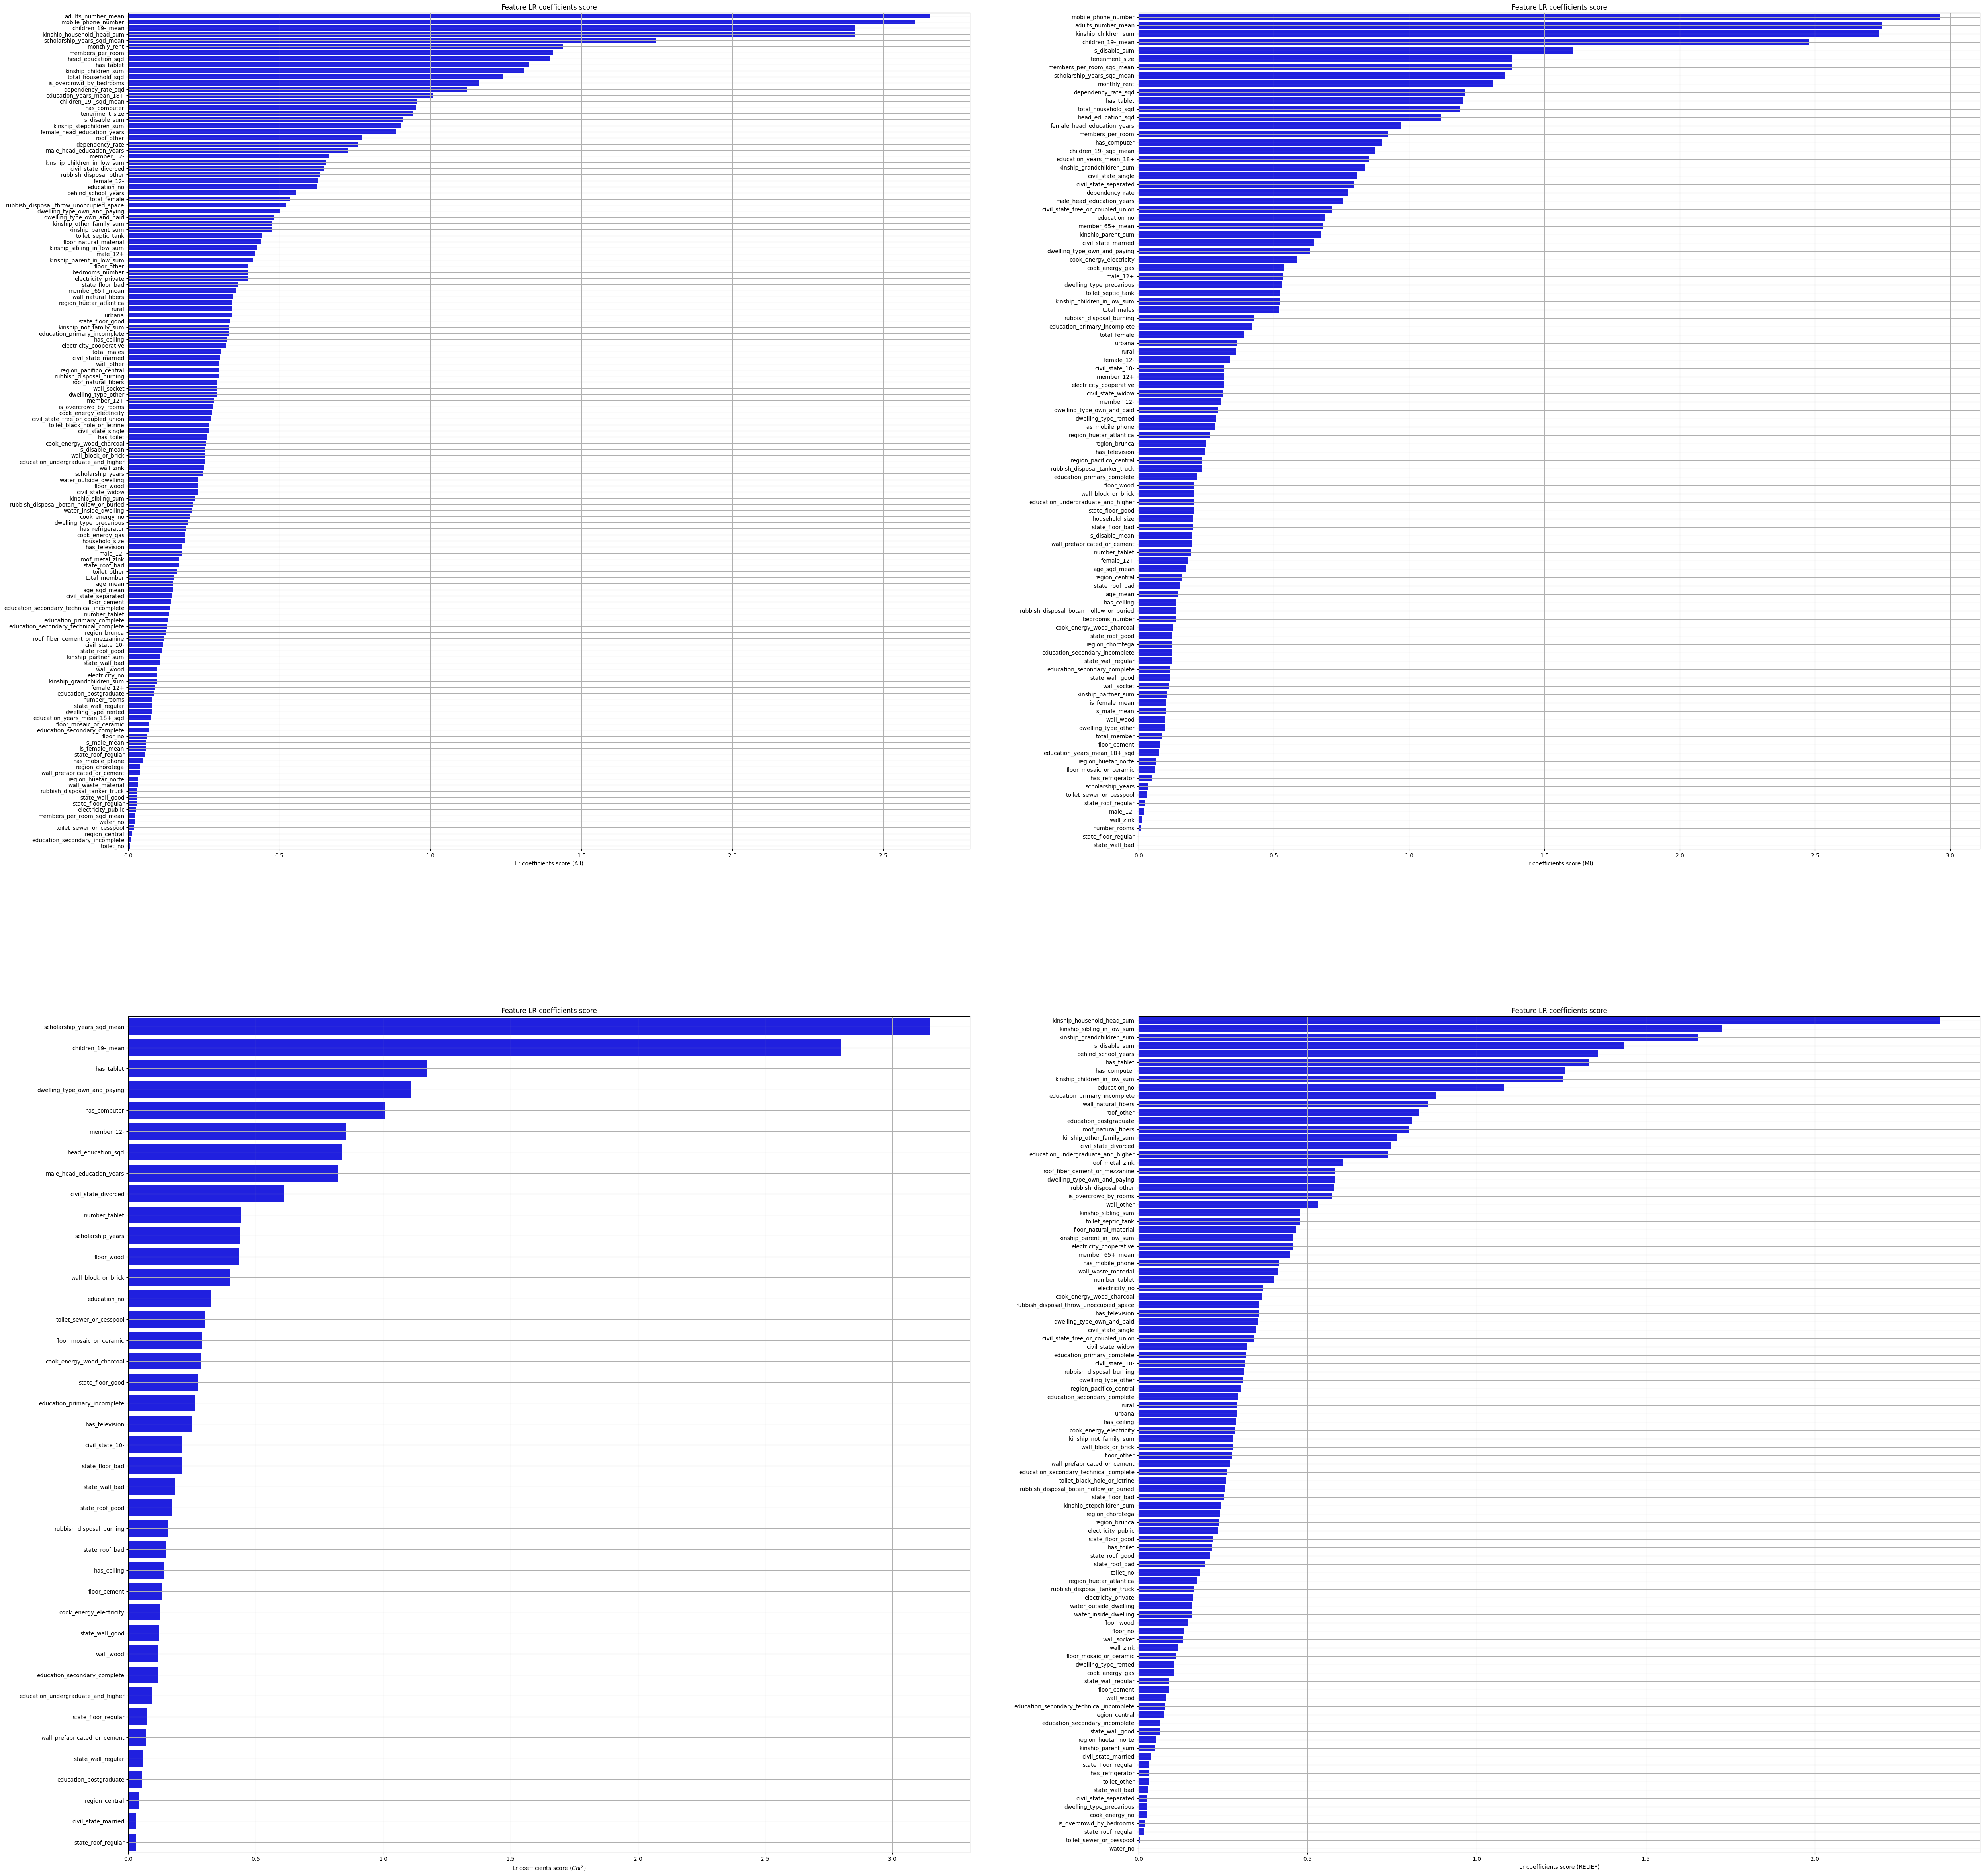

In [151]:
fig, axs = plt.subplots(2, 2, figsize=(60, 60))

plot_features_scores(
    X_train_all,
    np.abs(lr_all.coef_[0]),
    method='LR coefficients',
    metric_label='All',
    ax=axs[0][0]
)

plot_features_scores(
    X_train_mi,
    np.abs(lr_mi.coef_[0]),
    method='LR coefficients',
    metric_label='MI',
    ax=axs[0][1]
)

plot_features_scores(
    X_train_x2,
    np.abs(lr_x2.coef_[0]),
    method='LR coefficients',
    metric_label='$Chi^2$',
    ax=axs[1][0]
)

plot_features_scores(
    X_train_relief,
    np.abs(lr_relief.coef_[0]),
    method='LR coefficients',
    metric_label='RELIEF',
    ax=axs[1][1]
)

In [152]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_lr{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Metrics Summary

In [90]:
y_true_prediction = [
    (y_test_all, y_test_predict_all),
    (y_test_mi, y_test_predict_mi),
    (y_test_x2, y_test_predict_x2),
    (y_test_anova, y_test_predict_anova),
    (y_test_relief, y_test_predict_relief),
    (y_test_lr_wrapper, y_test_predict_lr_wrapper),
    (y_test_all, y_test_predict_lr_bagging)
]

metrics_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
        'Bagging'
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_summary

Precision    Recall   F-score
All features         0.766647  0.763793  0.763159
Mutual information   0.761276  0.760020  0.759288
Chi squared          0.773246  0.772075  0.770591
ANOVA                0.775103  0.772197  0.773186
RELIEF               0.741936  0.741533  0.741302
Wrapper              0.763013  0.750627  0.748467
Bagging              0.772846  0.769828  0.769189

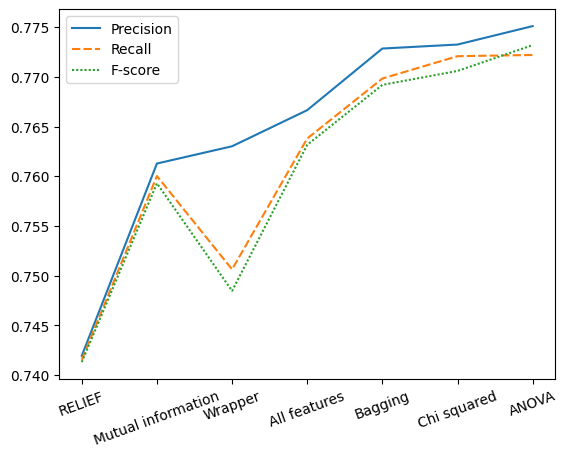

In [150]:
sns.lineplot(
    metrics_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
fig.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_lr{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Probability Distibution

In [102]:
y_test_proba_lr_all = lr_all.predict_proba(X_test_all)
y_test_proba_lr_mi = lr_mi.predict_proba(X_test_mi)
y_test_proba_lr_x2 = lr_x2.predict_proba(X_test_x2)
y_test_proba_lr_anova = lr_anova.predict_proba(X_test_anova)
y_test_proba_lr_relief = lr_relief.predict_proba(X_test_relief)
y_test_proba_lr_wrapper = lr_wrapper.predict_proba(X_test_lr_wrapper)
y_test_proba_lr_bagging = lr_bagging.predict_proba(X_test_all)

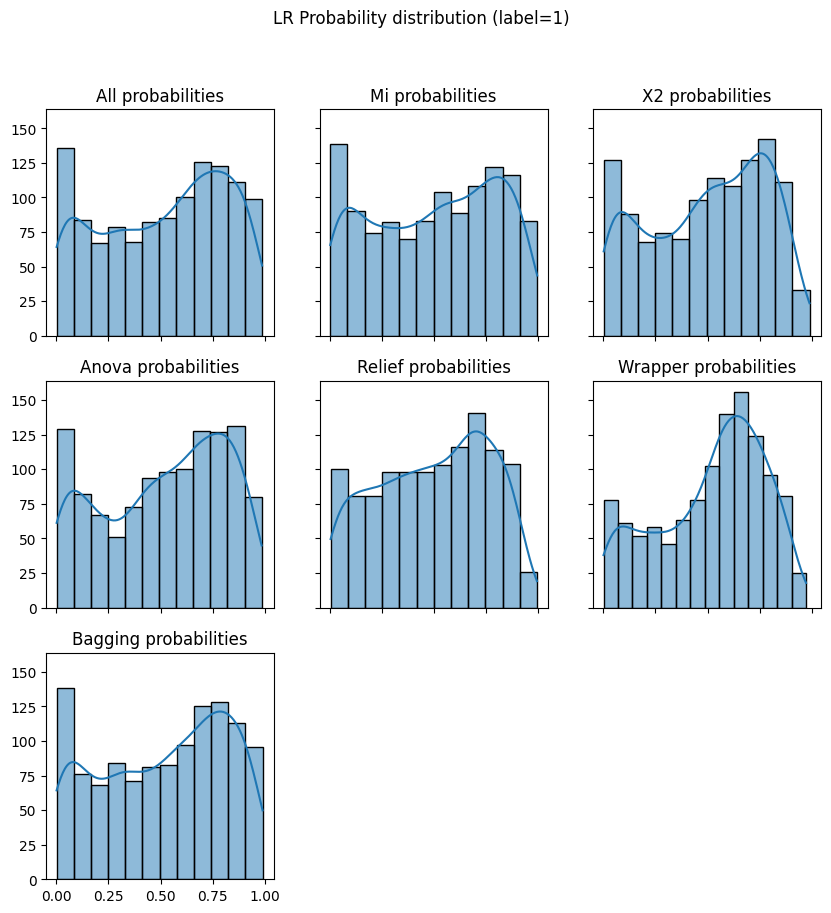

In [147]:
probabilities = [
    ('all', y_test_proba_lr_all[:, 1]),
    ('mi', y_test_proba_lr_mi[:, 1]),
    ('x2', y_test_proba_lr_x2[:, 1]),
    ('anova', y_test_proba_lr_anova[:, 1]),
    ('relief', y_test_proba_lr_relief[:, 1]),
    ('wrapper', y_test_proba_lr_wrapper[:, 1]),
    ('bagging', y_test_proba_lr_bagging[:, 1])
]

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('LR Probability distribution (label=1)')
for i, (name, probability) in enumerate(probabilities):
    x, y = i // 3, i % 3
    sns.histplot(probability, ax=axs[x][y], kde=True)
    axs[x][y].set_title(f'{name.title()} probabilities')
    axs[x][y].set_ylabel('')
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

In [148]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'probabilities' / f'probability_lr{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

# Bayes Models

## All features

### Training and score in the sample (81% - 0.01 std)

In [38]:
bn_all = BernoulliNB()
bn_all_scores = cross_val_score(
    bn_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_all_scores.mean(),
    bn_all_scores.std())
)

0.75 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [39]:
bn_all = BernoulliNB().fit(X_train_all, y_train_all['y'])
y_test_predict_bn_all = bn_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_bn_all))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       580
           1       0.75      0.77      0.76       580

    accuracy                           0.76      1160
   macro avg       0.76      0.76      0.76      1160
weighted avg       0.76      0.76      0.76      1160



## Univariate - Mutual Information

### Training and score in the sample (76% - 0.02 std)

In [40]:
bn_mi = BernoulliNB()
bn_mi_scores = cross_val_score(
    bn_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_mi_scores.mean(),
    bn_mi_scores.std())
)

0.75 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [41]:
bn_mi = BernoulliNB().fit(X_train_mi, y_train_mi['y'])
y_test_predict_bn_mi = bn_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_bn_mi))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       588
           1       0.74      0.77      0.75       572

    accuracy                           0.75      1160
   macro avg       0.75      0.75      0.75      1160
weighted avg       0.75      0.75      0.75      1160



## Univariate - $\chi^2$

### Training and score in the sample (74% - 0.01 std)

In [42]:
bn_x2 = BernoulliNB()
bn_x2_scores = cross_val_score(
    bn_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_x2_scores.mean(),
    bn_x2_scores.std())
)

0.70 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [43]:
bn_x2 = BernoulliNB().fit(X_train_x2, y_train_x2['y'])
y_test_predict_bn_x2 = bn_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_bn_x2))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       598
           1       0.70      0.69      0.70       562

    accuracy                           0.71      1160
   macro avg       0.71      0.71      0.71      1160
weighted avg       0.71      0.71      0.71      1160



## Univariate - ANOVA

### Training and score in the sample (75% - 0.01 std)

In [44]:
bn_anova = BernoulliNB()
bn_anova_scores = cross_val_score(
    bn_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_anova_scores.mean(),
    bn_anova_scores.std())
)

0.76 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [45]:
bn_anova = BernoulliNB().fit(X_train_anova, y_train_anova['y'])
y_test_predict_bn_anova = bn_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_bn_anova))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       531
           1       0.77      0.74      0.76       629

    accuracy                           0.74      1160
   macro avg       0.74      0.74      0.74      1160
weighted avg       0.74      0.74      0.74      1160



## Multivariate - Relief

### Training and score in the sample (73% - 0.02 std)

In [46]:
bn_relief = BernoulliNB()
bn_relief_scores = cross_val_score(
    bn_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_relief_scores.mean(),
    bn_relief_scores.std())
)

0.71 accuracy with a standard deviation of 0.03


### Out-of-sample score

In [47]:
bn_relief = BernoulliNB().fit(X_train_relief, y_train_relief['y'])
y_test_predict_bn_relief = bn_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_bn_relief))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       584
           1       0.74      0.70      0.72       576

    accuracy                           0.73      1160
   macro avg       0.73      0.73      0.73      1160
weighted avg       0.73      0.73      0.73      1160



## Wrapper

### Select features

In [48]:
if RUN_WRAPPER_SELECTION:
    bn_wrapper = BernoulliNB()

    bn_fs_wrapper = SequentialFeatureSelectorTransformer(
        bn_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_bn_wrapper = bn_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_bn_wrapper, X_test_bn_wrapper, y_train_bn_wrapper, y_test_bn_wrapper = split_train_test(X_bn_wrapper, y)

    X_bn_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_bn.parquet')

Fitting model. This may take a while...
We have a winner!


### Training and score in the sample (81% - 0.01 std)

In [49]:
if not RUN_WRAPPER_SELECTION:
    X_bn_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_bn.parquet')
    X_train_bn_wrapper, X_test_bn_wrapper, y_train_bn_wrapper, y_test_bn_wrapper = split_train_test(X_bn_wrapper, y)

In [50]:
bn_wrapper = BernoulliNB()
bn_wrapper_scores = cross_val_score(
    bn_wrapper,
    X_train_bn_wrapper,
    y_train_bn_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_wrapper_scores.mean(),
    bn_wrapper_scores.std())
)

0.78 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [51]:
bn_wrapper = BernoulliNB().fit(X_train_bn_wrapper, y_train_bn_wrapper['y'])
y_test_predict_bn_wrapper = bn_wrapper.predict(X_test_bn_wrapper)

print(classification_report(y_test_bn_wrapper['y'], y_test_predict_bn_wrapper))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       562
           1       0.77      0.76      0.76       598

    accuracy                           0.76      1160
   macro avg       0.76      0.76      0.76      1160
weighted avg       0.76      0.76      0.76      1160



## Metaclassifier - Bagging

### Training and score in the sample (75% - 0.01 std)

In [52]:
bn_bagging = BernoulliNB()
bn_bagging_scores = cross_val_score(
    bn_bagging,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    bn_bagging_scores.mean(),
    bn_bagging_scores.std())
)

0.75 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [53]:
bn_bagging = BernoulliNB().fit(X_train_all, y_train_all['y'])
y_test_predict_bn_bagging = bn_bagging.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_bn_bagging))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       580
           1       0.75      0.77      0.76       580

    accuracy                           0.76      1160
   macro avg       0.76      0.76      0.76      1160
weighted avg       0.76      0.76      0.76      1160



## Metrics Summary

In [91]:
y_true_prediction_bn = [
    (y_test_all, y_test_predict_bn_all),
    (y_test_mi, y_test_predict_bn_mi),
    (y_test_x2, y_test_predict_bn_x2),
    (y_test_anova, y_test_predict_bn_anova),
    (y_test_relief, y_test_predict_bn_relief),
    (y_test_bn_wrapper, y_test_predict_bn_wrapper),
    (y_test_all, y_test_predict_bn_bagging)
]

metrics_bn_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_bn],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
        'Bagging'
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_bn_summary

Precision    Recall   F-score
All features         0.755476  0.755172  0.755100
Mutual information   0.753643  0.753615  0.753448
Chi squared          0.705743  0.705617  0.705667
ANOVA                0.738205  0.739397  0.738533
RELIEF               0.728252  0.727383  0.727262
Wrapper              0.759333  0.759545  0.759371
Bagging              0.755476  0.755172  0.755100

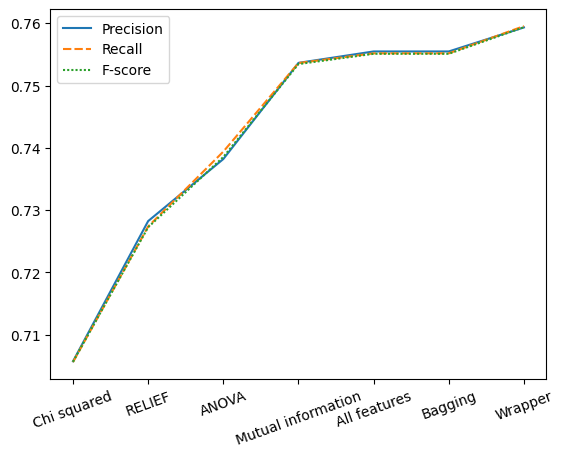

In [153]:
sns.lineplot(
    metrics_bn_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_bn{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Probability Distibution

In [130]:
y_test_proba_bn_all = bn_all.predict_proba(X_test_all)
y_test_proba_bn_mi = bn_mi.predict_proba(X_test_mi)
y_test_proba_bn_x2 = bn_x2.predict_proba(X_test_x2)
y_test_proba_bn_anova = bn_anova.predict_proba(X_test_anova)
y_test_proba_bn_relief = bn_relief.predict_proba(X_test_relief)
y_test_proba_bn_wrapper = bn_wrapper.predict_proba(X_test_bn_wrapper)
y_test_proba_bn_bagging = bn_bagging.predict_proba(X_test_all)

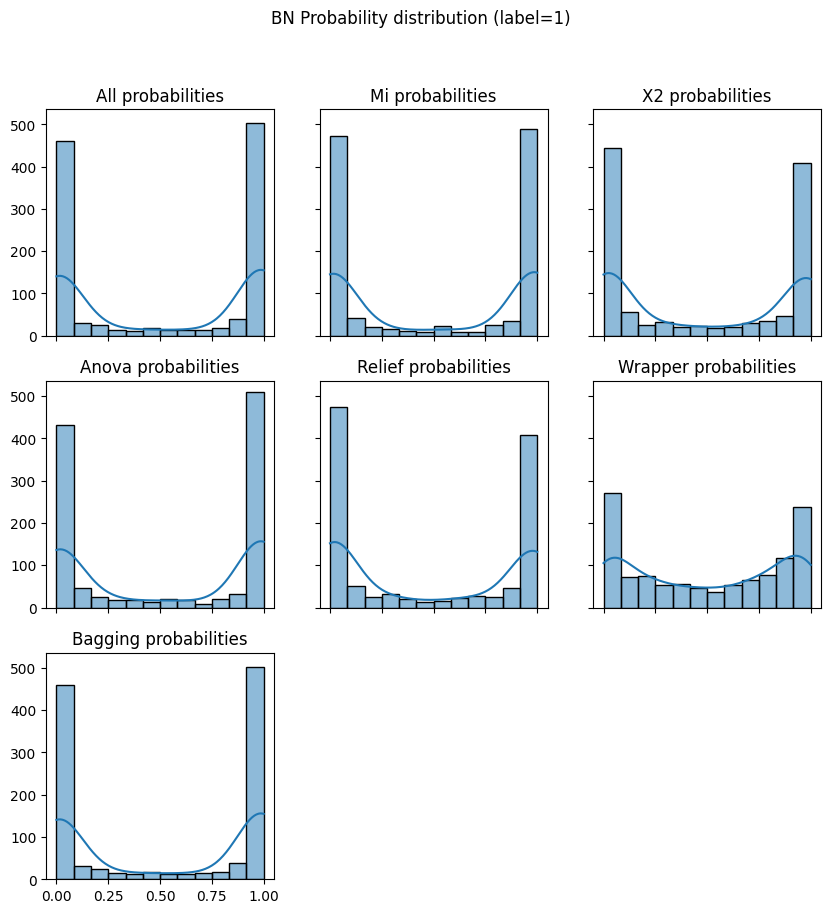

In [145]:
probabilities = [
    ('all', y_test_proba_bn_all[:, 1]),
    ('mi', y_test_proba_bn_mi[:, 1]),
    ('x2', y_test_proba_bn_x2[:, 1]),
    ('anova', y_test_proba_bn_anova[:, 1]),
    ('relief', y_test_proba_bn_relief[:, 1]),
    ('wrapper', y_test_proba_bn_wrapper[:, 1]),
    ('bagging', y_test_proba_bn_bagging[:, 1])
]

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('BN Probability distribution (label=1)')
for i, (name, probability) in enumerate(probabilities):
    x, y = i // 3, i % 3
    sns.histplot(probability, ax=axs[x][y], kde=True)
    axs[x][y].set_title(f'{name.title()} probabilities')
    axs[x][y].set_ylabel('')
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

In [146]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'probabilities' / f'probability_bn{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

# Discriminant Analysis

In [54]:
da_parameters = {
    'n_components': 1
}

## All features

### Training and score in the sample (81% - 0.01 std)

In [55]:
da_all = LinearDiscriminantAnalysis(**da_parameters)
da_all_scores = cross_val_score(
    da_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_all_scores.mean(),
    da_all_scores.std())
)

0.77 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [56]:
da_all = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_all, y_train_all['y'])
y_test_predict_da_all = da_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_da_all))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       580
           1       0.75      0.83      0.79       580

    accuracy                           0.78      1160
   macro avg       0.78      0.78      0.78      1160
weighted avg       0.78      0.78      0.78      1160



### Feature Importances

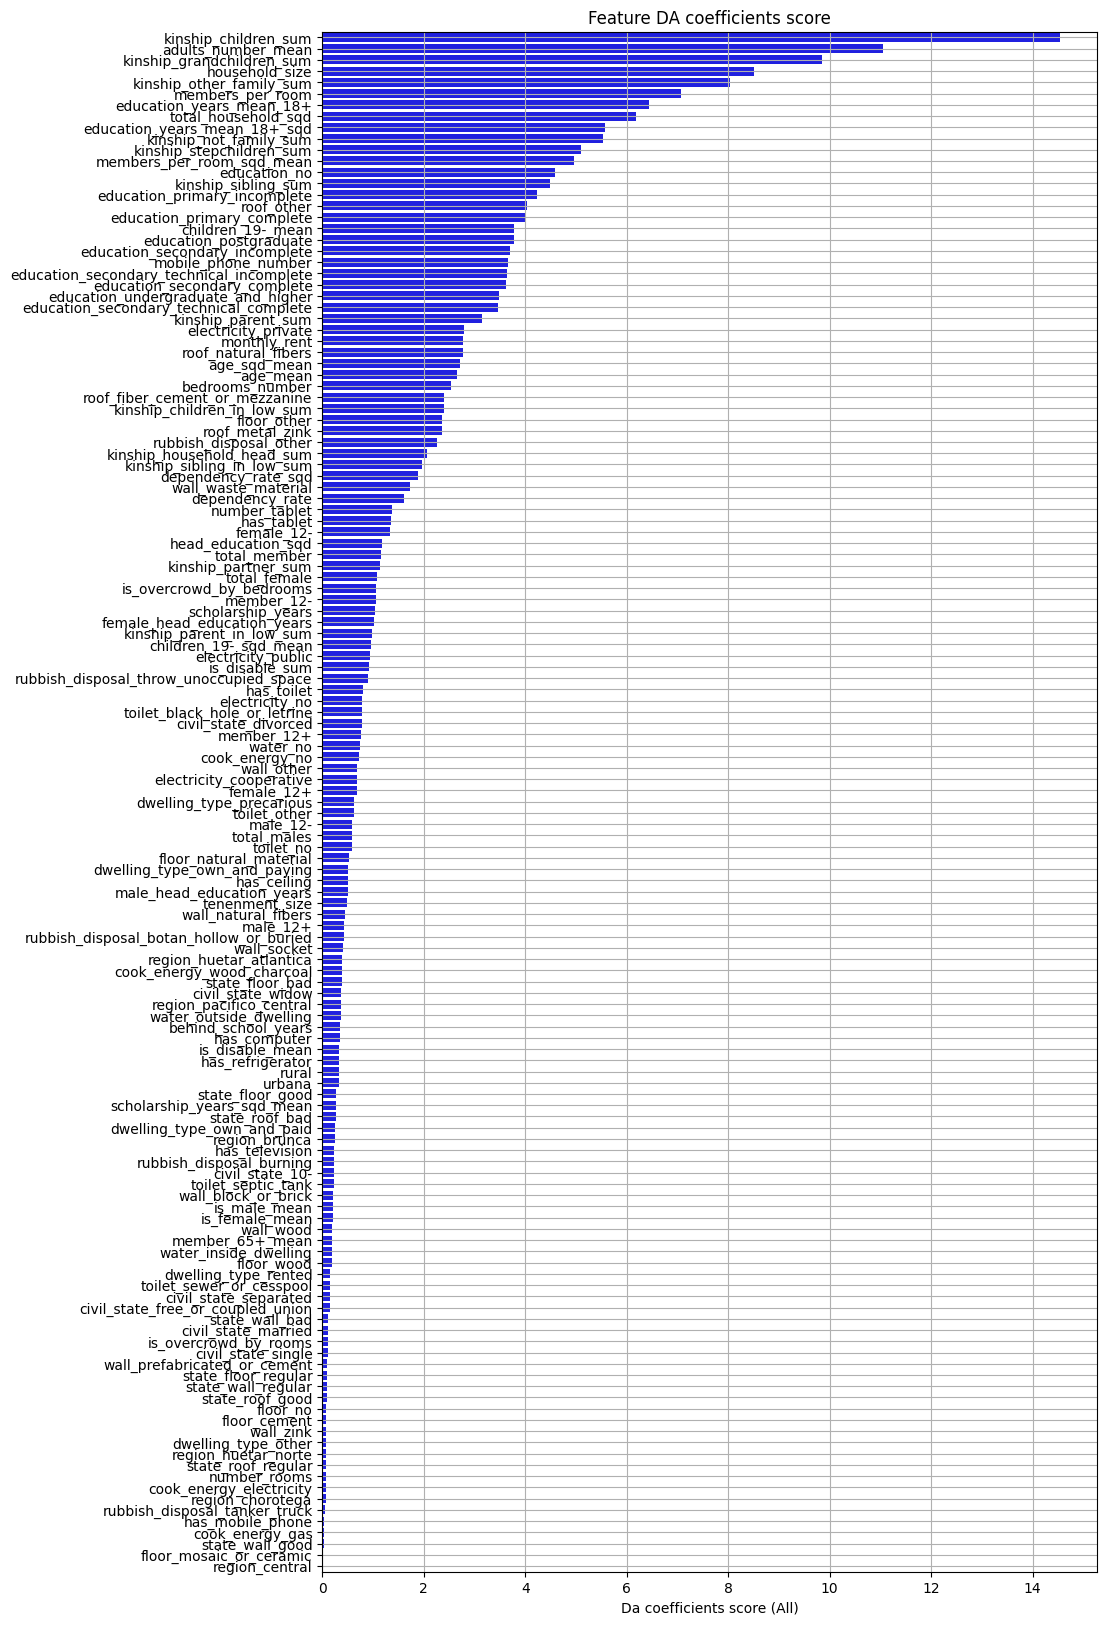

In [57]:
plot_features_scores(
    X_train_all,
    np.abs(da_all.coef_[0]),
    method='DA coefficients',
    metric_label='All'
)

In [58]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / 'fi_da_all.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Univariate - Mutual Information

### Training and score in the sample (76% - 0.01 std)

In [59]:
da_mi = LinearDiscriminantAnalysis(**da_parameters)
da_mi_scores = cross_val_score(
    da_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_mi_scores.mean(),
    da_mi_scores.std())
)

0.77 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [60]:
da_mi = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_mi, y_train_mi['y'])
y_test_predict_da_mi = da_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_da_mi))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       588
           1       0.75      0.81      0.78       572

    accuracy                           0.78      1160
   macro avg       0.78      0.78      0.77      1160
weighted avg       0.78      0.78      0.77      1160



### Feature Importances

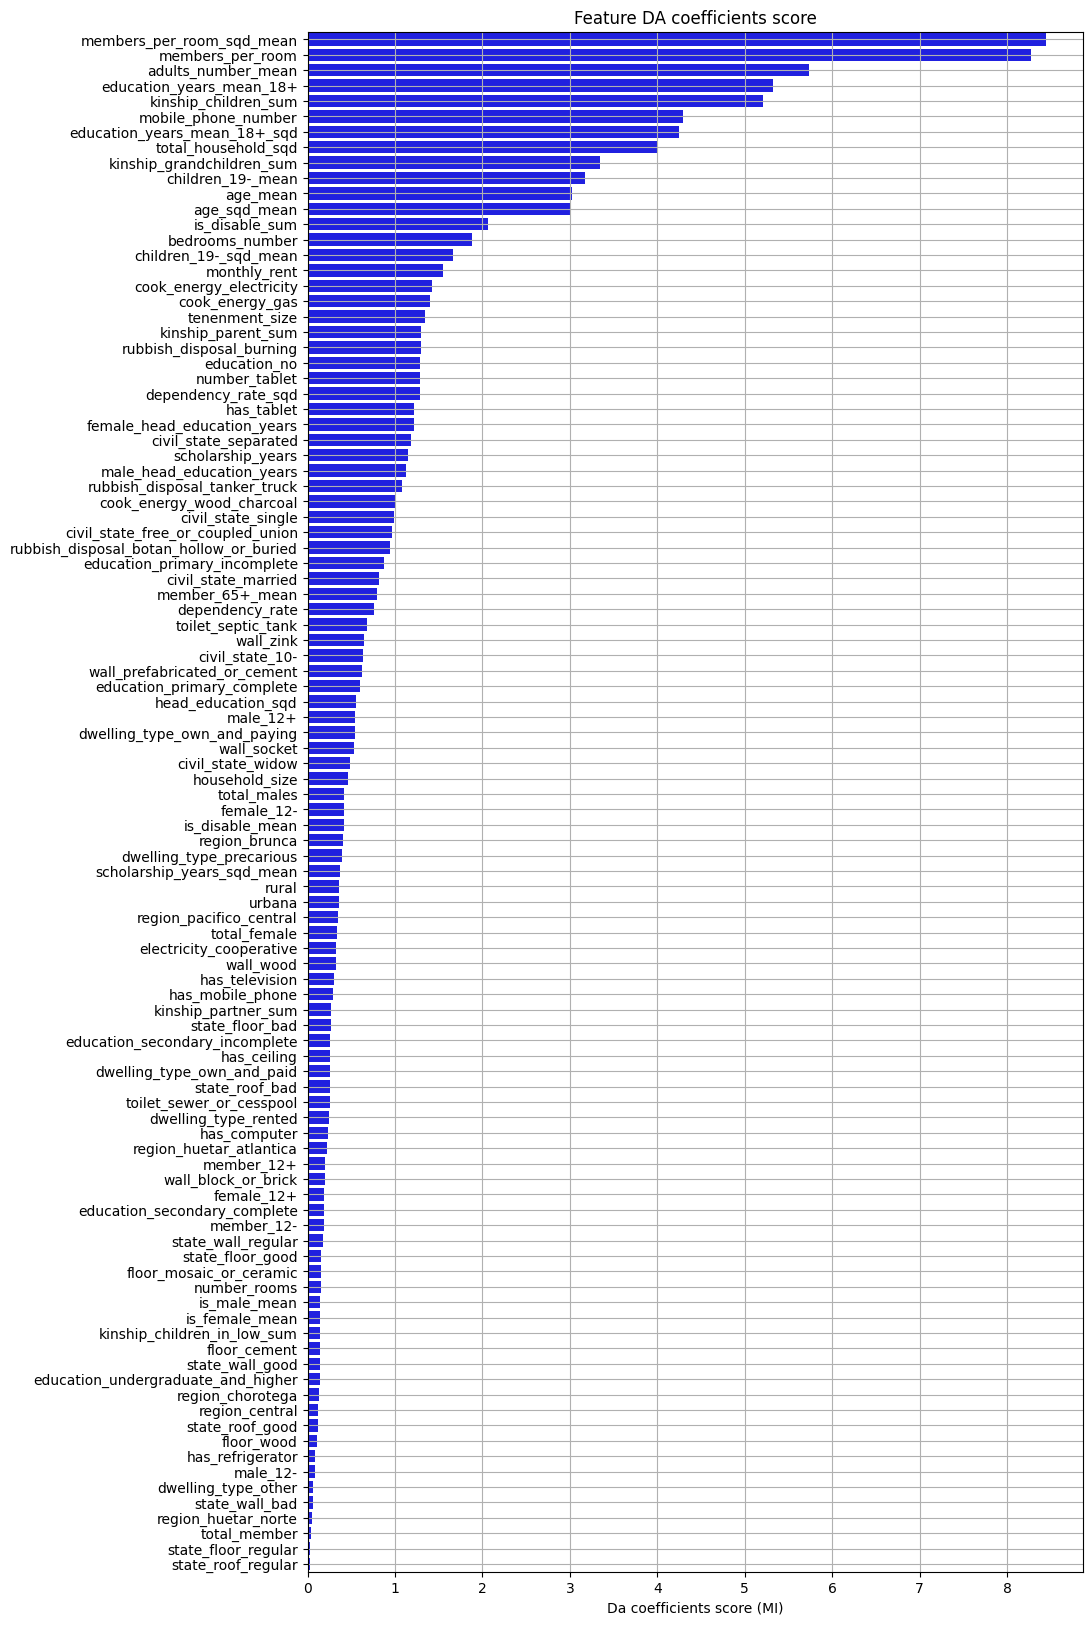

In [61]:
plot_features_scores(
    X_train_mi,
    np.abs(da_mi.coef_[0]),
    method='DA coefficients',
    metric_label='MI'
)

## Univariate - $\chi^2$

### Training and score in the sample (81% - 0.01 std)

In [62]:
da_x2 = LinearDiscriminantAnalysis(**da_parameters)
da_x2_scores = cross_val_score(
    da_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_x2_scores.mean(),
    da_x2_scores.std())
)

0.73 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [63]:
da_x2 = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_x2, y_train_x2['y'])
y_test_predict_da_x2 = da_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_da_x2))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       598
           1       0.73      0.82      0.77       562

    accuracy                           0.77      1160
   macro avg       0.77      0.77      0.77      1160
weighted avg       0.77      0.77      0.77      1160



### Feature Importances

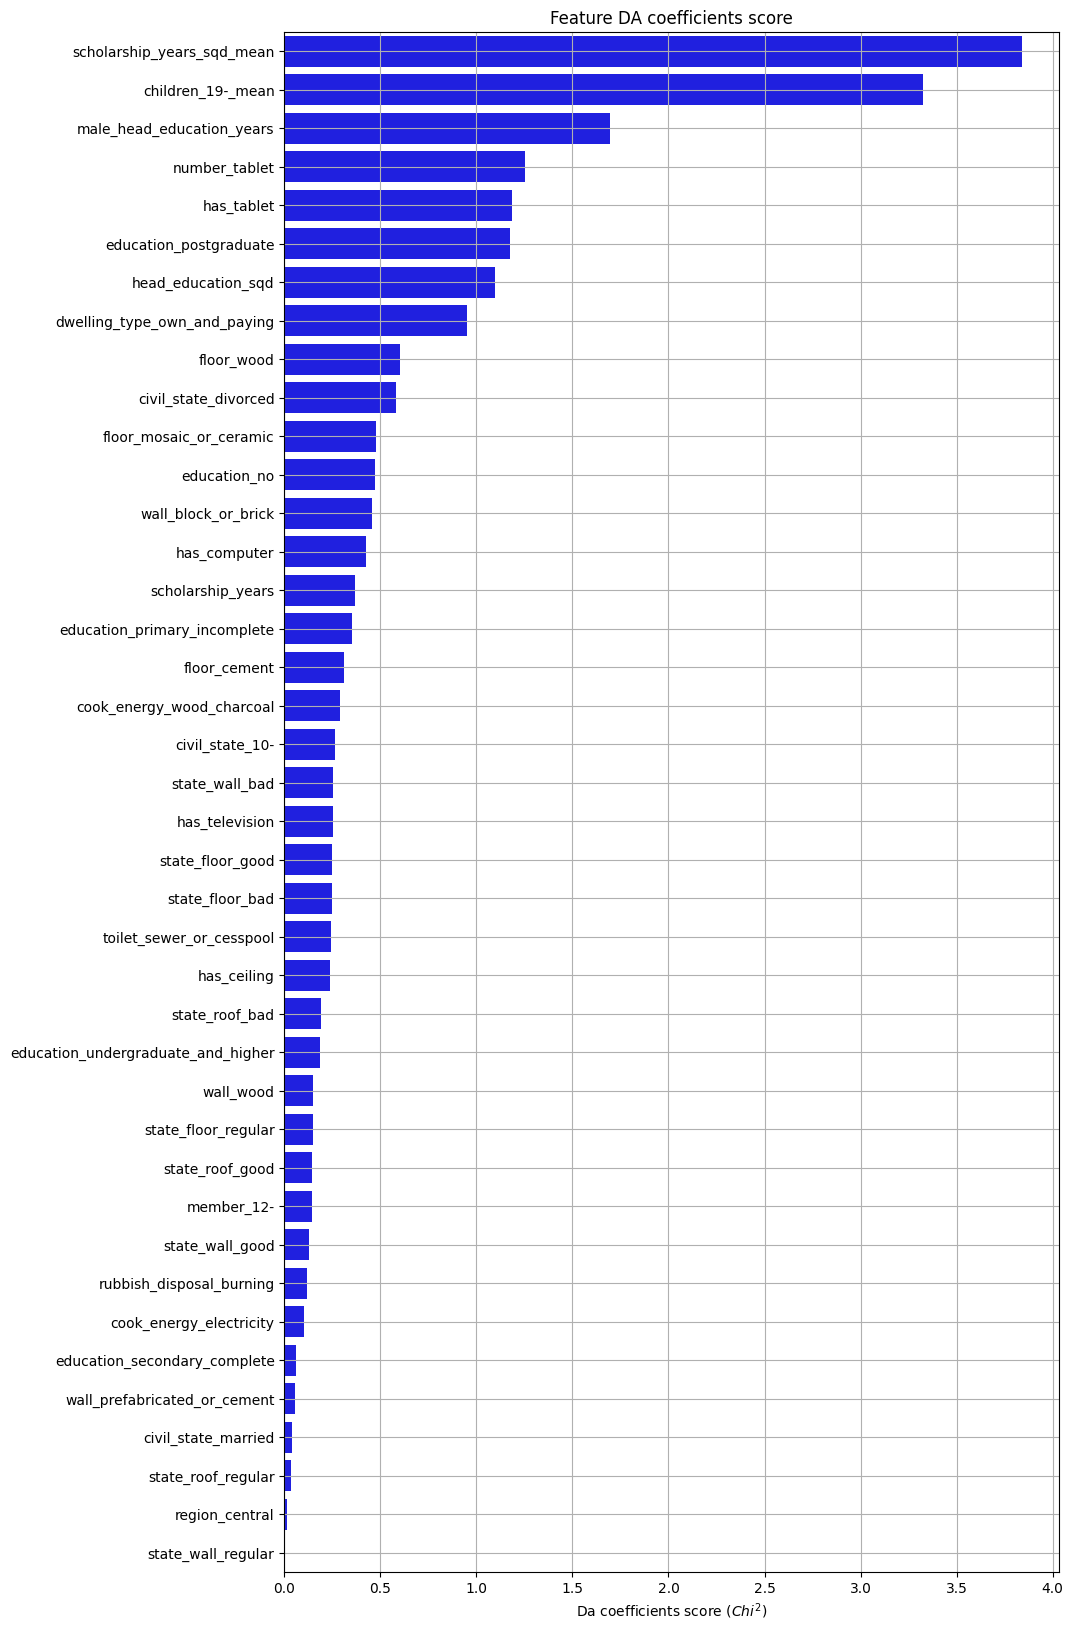

In [65]:
plot_features_scores(
    X_train_x2,
    np.abs(da_x2.coef_[0]),
    method='DA coefficients',
    metric_label='$Chi^2$'
)

In [66]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / 'fi_da_x2.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Univariate - ANOVA

### Training and score in the sample (81% - 0.01 std)

In [67]:
da_anova = LinearDiscriminantAnalysis(**da_parameters)
da_anova_scores = cross_val_score(
    da_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_anova_scores.mean(),
    da_anova_scores.std())
)

0.77 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [68]:
da_anova = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_anova, y_train_anova['y'])
y_test_predict_da_anova = da_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_da_anova))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       531
           1       0.79      0.82      0.80       629

    accuracy                           0.78      1160
   macro avg       0.78      0.78      0.78      1160
weighted avg       0.78      0.78      0.78      1160



### Feature Importances

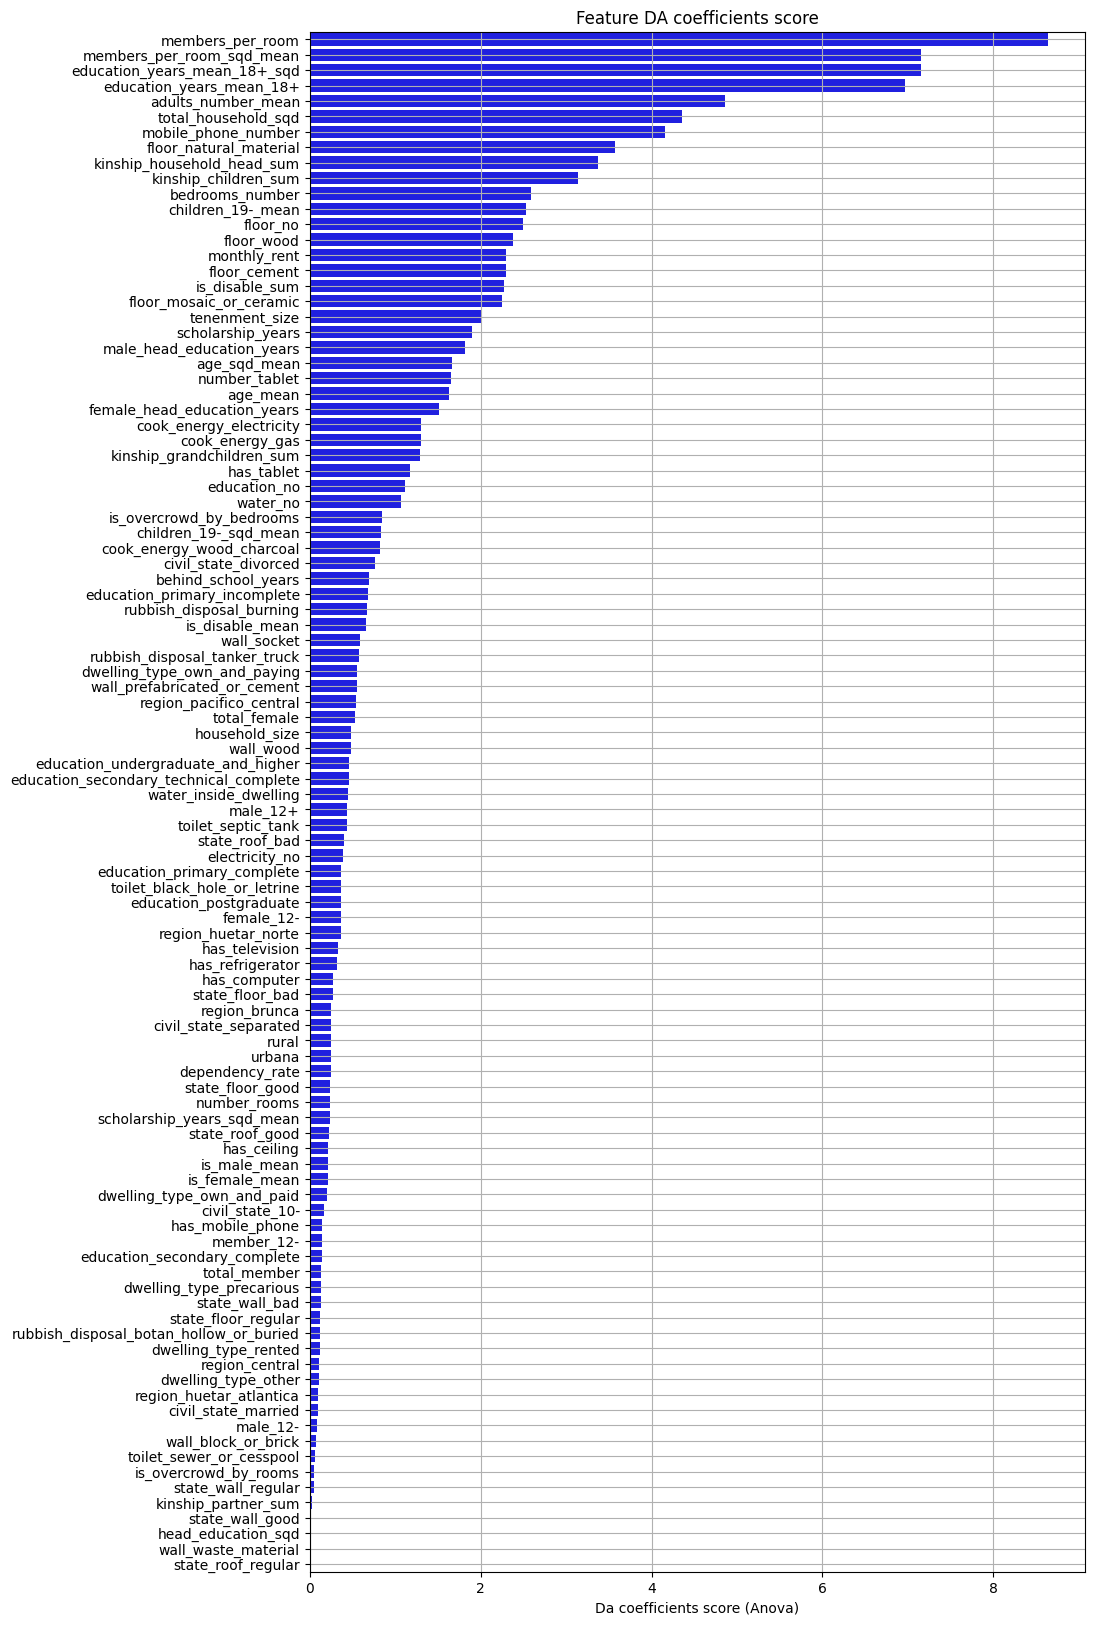

In [69]:
plot_features_scores(
    X_train_anova,
    np.abs(da_anova.coef_[0]),
    method='DA coefficients',
    metric_label='Anova'
)

In [70]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / 'fi_da_anova.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Multivariate - Relief

### Training and score in the sample (81% - 0.01 std)

In [71]:
da_relief = LinearDiscriminantAnalysis(**da_parameters)
da_relief_scores = cross_val_score(
    da_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_relief_scores.mean(),
    da_relief_scores.std())
)

0.73 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [72]:
da_relief = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_relief, y_train_relief['y'])
y_test_predict_da_relief = da_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_da_relief))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       584
           1       0.72      0.77      0.74       576

    accuracy                           0.74      1160
   macro avg       0.74      0.74      0.74      1160
weighted avg       0.74      0.74      0.74      1160



### Feature Importances

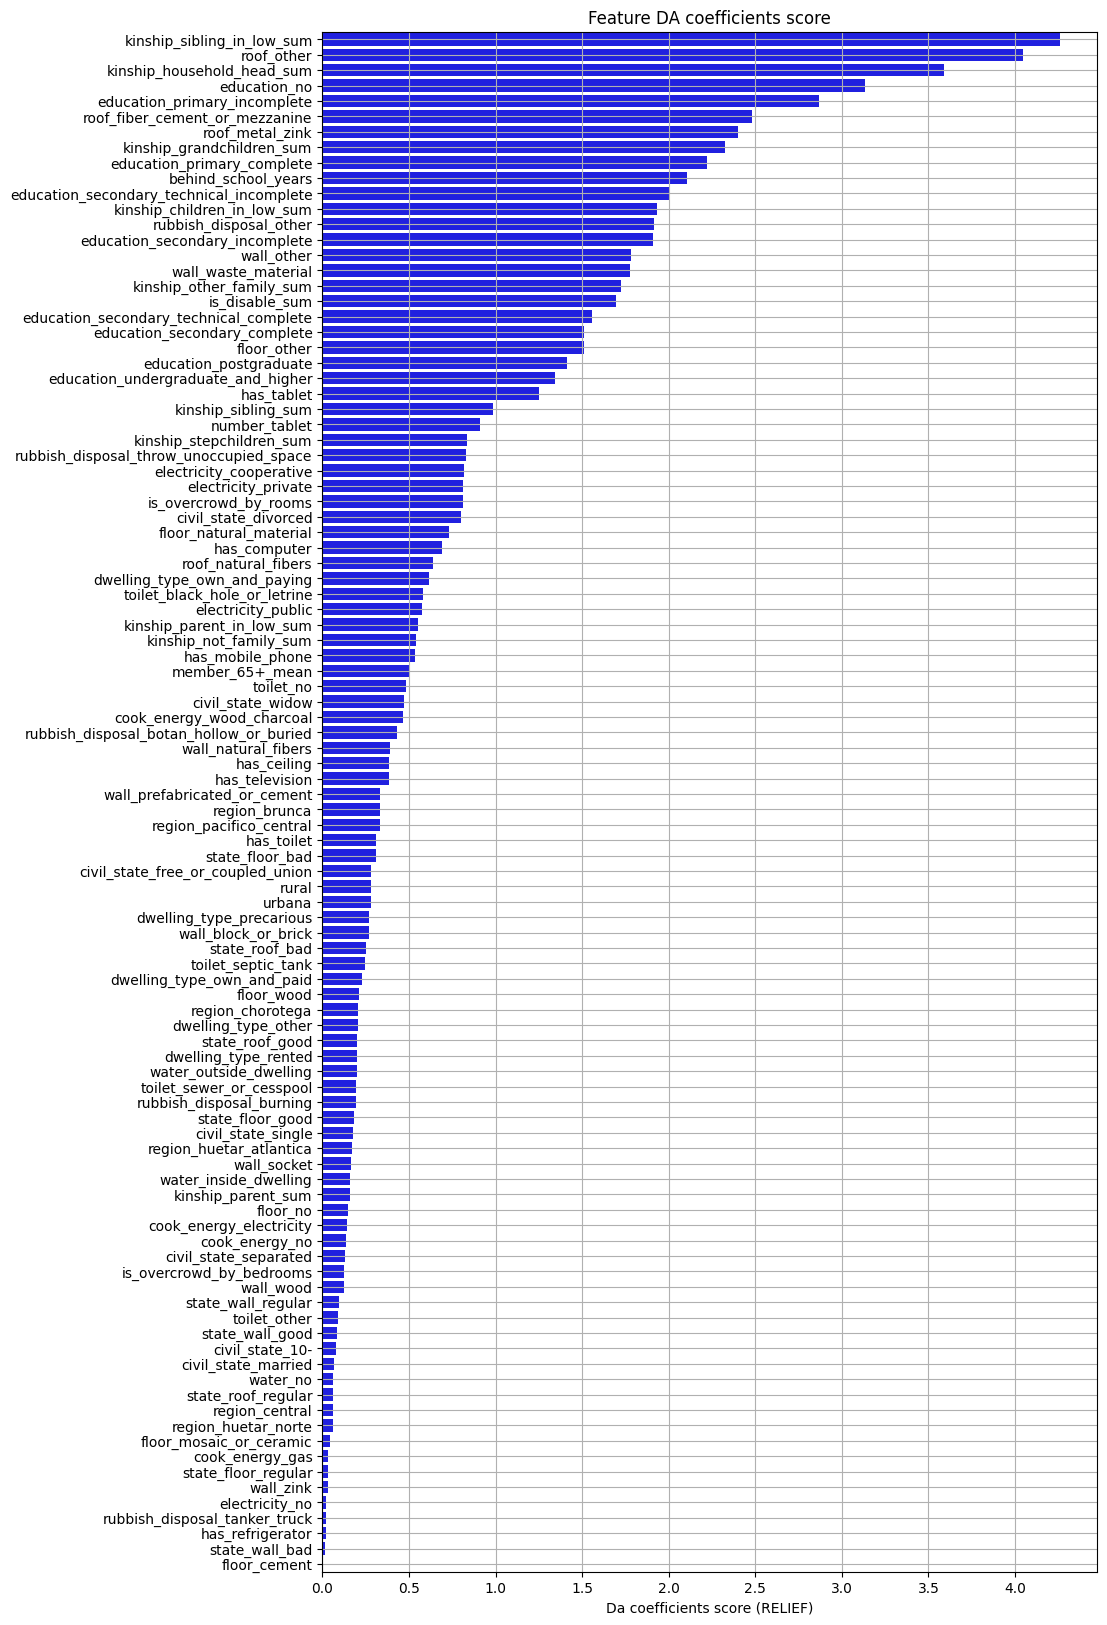

In [73]:
plot_features_scores(
    X_train_relief,
    np.abs(da_relief.coef_[0]),
    method='DA coefficients',
    metric_label='RELIEF'
)

In [74]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / 'fi_da_relief.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Wrapper

In [75]:
if RUN_WRAPPER_SELECTION:
    da_wrapper = LinearDiscriminantAnalysis(**da_parameters)

    da_fs_wrapper = SequentialFeatureSelectorTransformer(
        da_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_da_wrapper = da_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    (X_train_da_wrapper, X_test_da_wrapper,
     y_train_da_wrapper, y_test_da_wrapper) = split_train_test(X_da_wrapper, y)

    X_da_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_da.parquet')

Fitting model. This may take a while...


c:\Users\gabya\anaconda3\envs\project-ml\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gabya\anaconda3\envs\project-ml\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gabya\anaconda3\envs\project-ml\lib\site-packages\sklearn\discriminant_analysis.py", line 596, in fit
    self._solve_svd(X, y)
  File "c:\Users\gabya\anaconda3\envs\project-ml\lib\site-packages\sklearn\discriminant_analysis.py", line 512, in _solve_svd
    _, S, 

We have a winner!


### Training and score in the sample (81% - 0.01 std)

In [76]:
if not RUN_WRAPPER_SELECTION:
    X_da_wrapper = pd.read_parquet(
        STAGE_DIR / 'selection' / 'X_train_da.parquet')
    (X_train_da_wrapper, X_test_da_wrapper,
     y_train_da_wrapper, y_test_da_wrapper) = split_train_test(X_da_wrapper, y)

In [77]:
da_wrapper = LinearDiscriminantAnalysis(**da_parameters)
da_wrapper_scores = cross_val_score(
    da_wrapper,
    X_train_da_wrapper,
    y_train_da_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_wrapper_scores.mean(),
    da_wrapper_scores.std())
)

0.76 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [78]:
da_wrapper = LinearDiscriminantAnalysis(
    **da_parameters
).fit(X_train_da_wrapper, y_train_da_wrapper['y'])
y_test_predict_da_wrapper = da_wrapper.predict(X_test_da_wrapper)

print(classification_report(y_test_da_wrapper['y'], y_test_predict_da_wrapper))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       574
           1       0.75      0.86      0.80       586

    accuracy                           0.78      1160
   macro avg       0.79      0.78      0.78      1160
weighted avg       0.79      0.78      0.78      1160



### Feature Importances

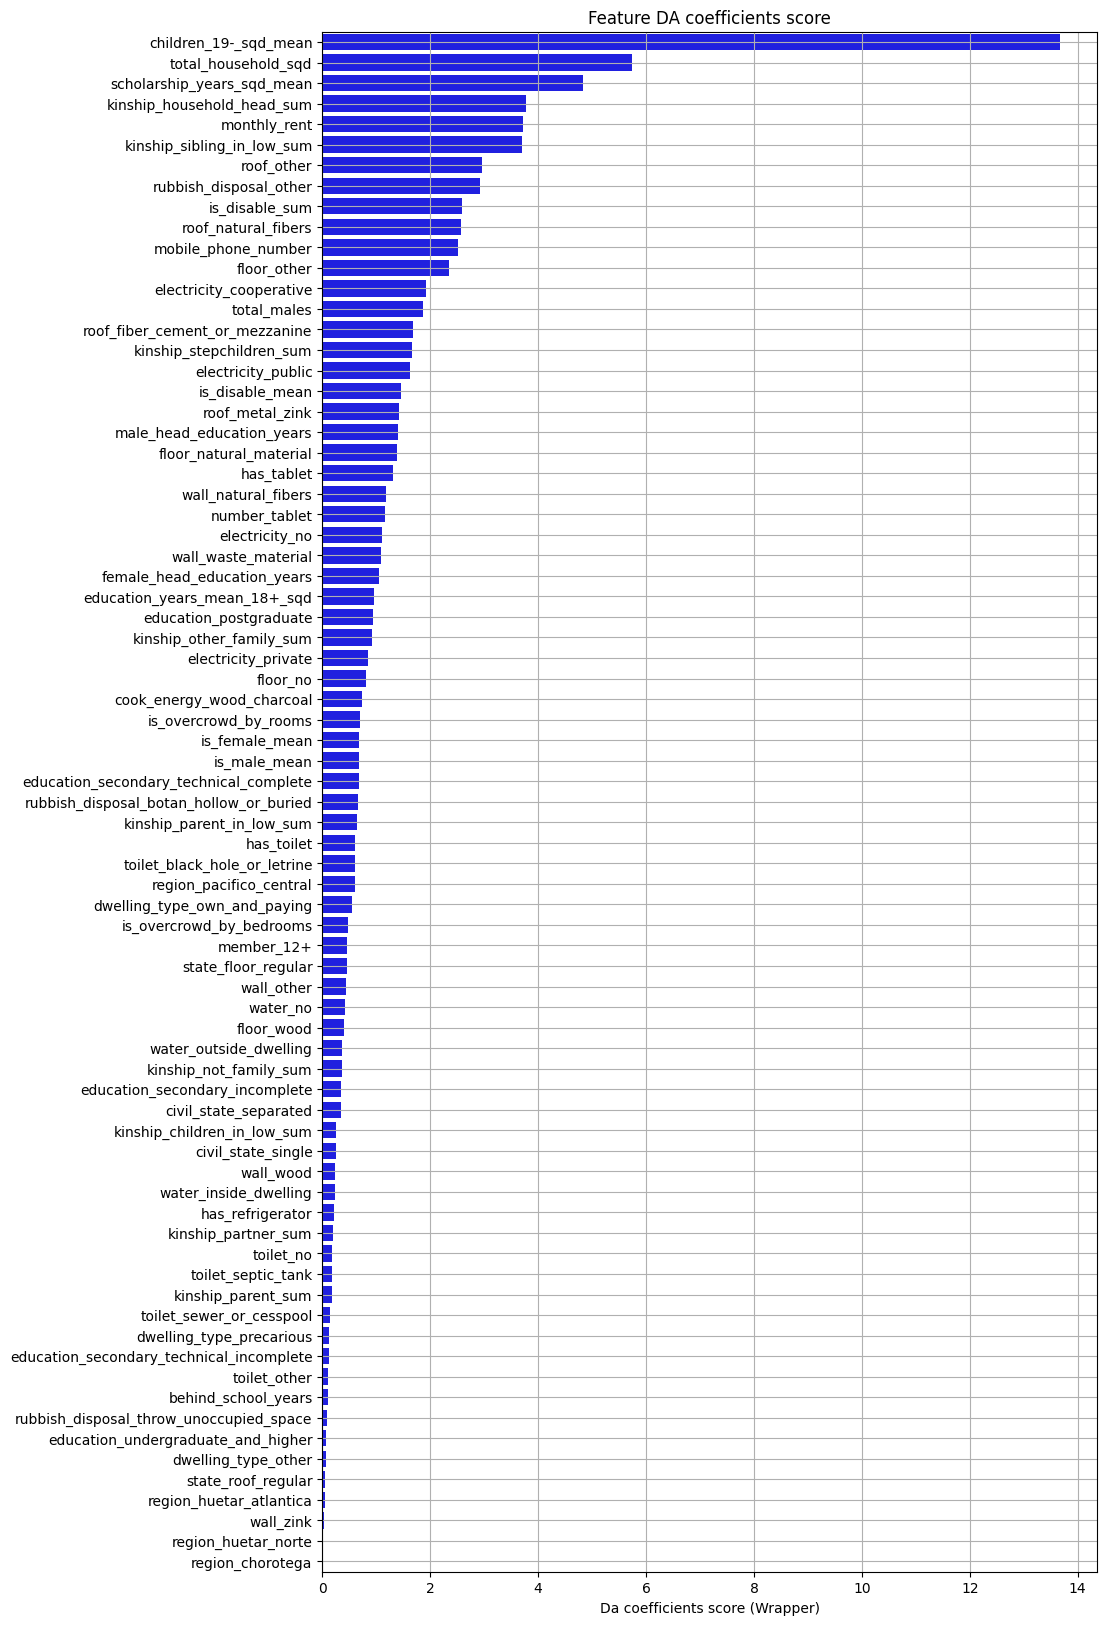

In [79]:
plot_features_scores(
    X_train_da_wrapper,
    np.abs(da_wrapper.coef_[0]),
    method='DA coefficients',
    metric_label='Wrapper'
)

In [80]:
plt.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / 'fi_da_wrapper.pdf',
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>

## Metaclassifier - Bagging

### Training and score in the sample (81% - 0.01 std)

In [81]:
da_bagging = BaggingClassifier(
    LinearDiscriminantAnalysis()
)
da_bagging_scores = cross_val_score(
    da_bagging,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    da_bagging_scores.mean(),
    da_bagging_scores.std())
)

0.77 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [82]:
da_bagging = LinearDiscriminantAnalysis().fit(X_train_all, y_train_all['y'])
y_test_predict_da_bagging = da_bagging.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_da_bagging))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       580
           1       0.75      0.83      0.79       580

    accuracy                           0.78      1160
   macro avg       0.78      0.78      0.78      1160
weighted avg       0.78      0.78      0.78      1160



## Feature Importances (summary)

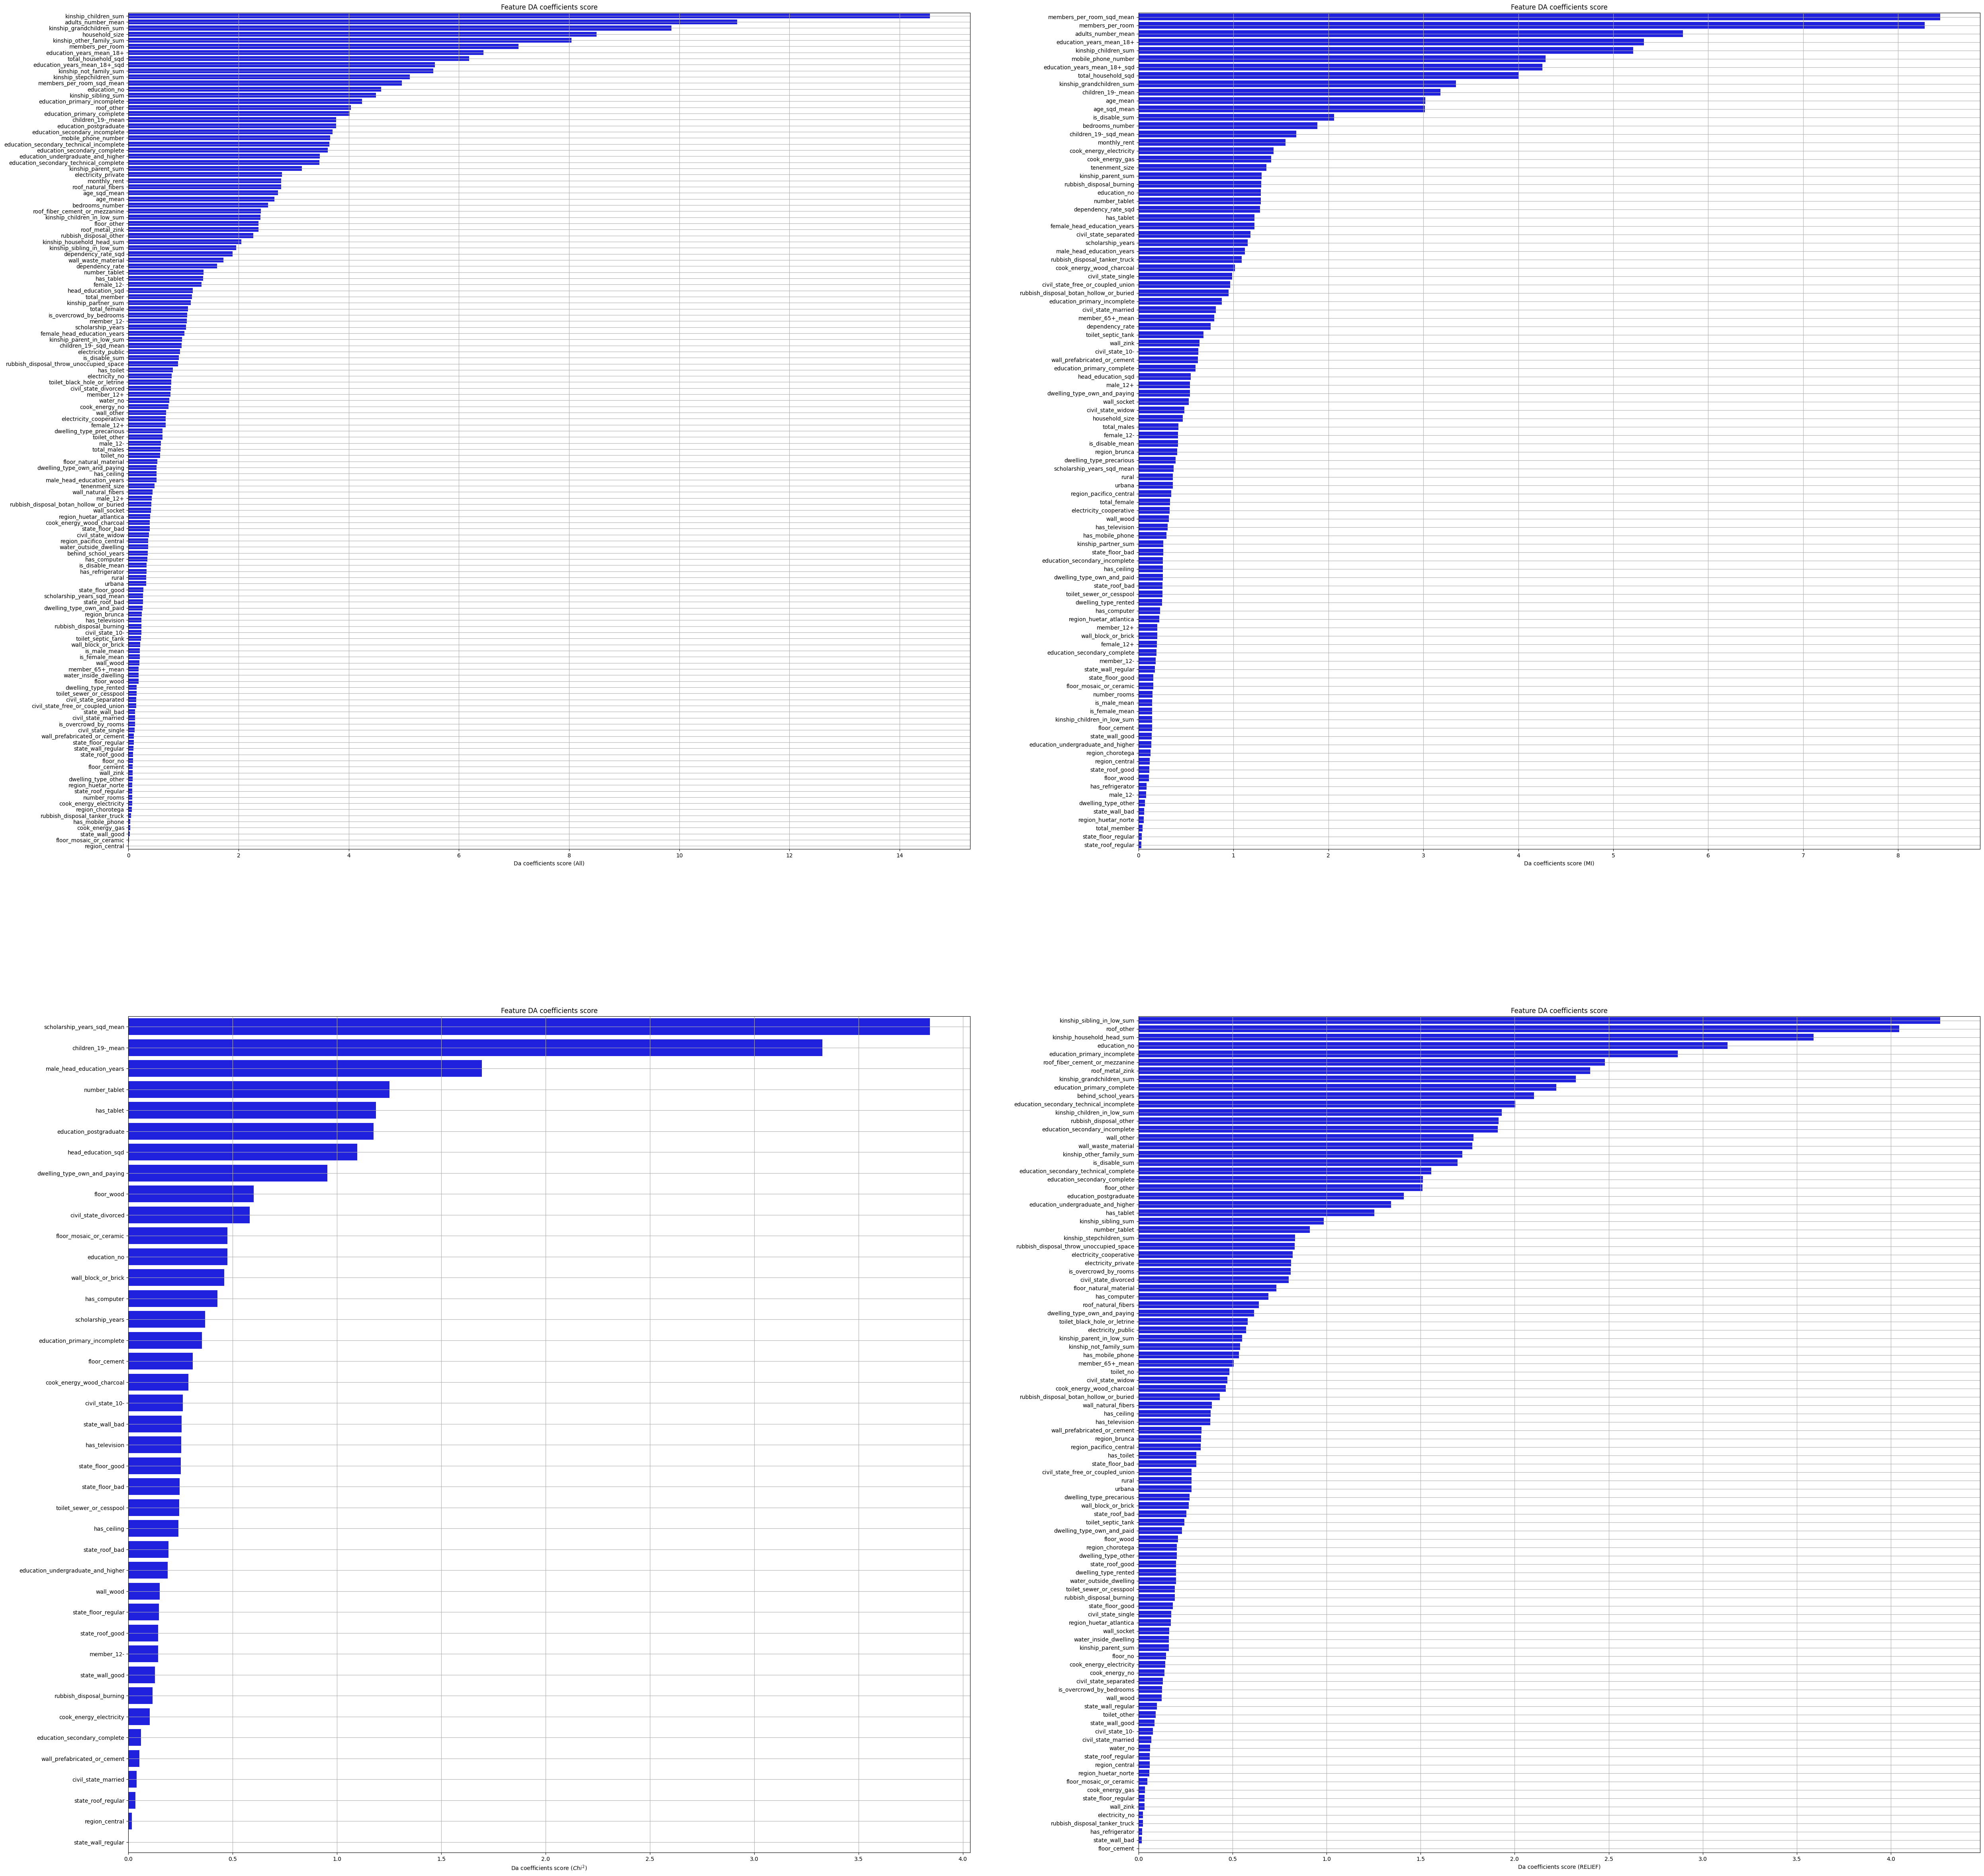

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(60, 60))

plot_features_scores(
    X_train_all,
    np.abs(da_all.coef_[0]),
    method='DA coefficients',
    metric_label='All',
    ax=axs[0][0]
)

plot_features_scores(
    X_train_mi,
    np.abs(da_mi.coef_[0]),
    method='DA coefficients',
    metric_label='MI',
    ax=axs[0][1]
)

plot_features_scores(
    X_train_x2,
    np.abs(da_x2.coef_[0]),
    method='DA coefficients',
    metric_label='$Chi^2$',
    ax=axs[1][0]
)

plot_features_scores(
    X_train_relief,
    np.abs(da_relief.coef_[0]),
    method='DA coefficients',
    metric_label='RELIEF',
    ax=axs[1][1]
)

In [144]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'probabilistic-models' / f'fi_da{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Metrics Summary

In [92]:
y_true_prediction_da = [
    (y_test_all, y_test_predict_da_all),
    (y_test_mi, y_test_predict_da_mi),
    (y_test_x2, y_test_predict_da_x2),
    (y_test_anova, y_test_predict_da_anova),
    (y_test_relief, y_test_predict_da_relief),
    (y_test_da_wrapper, y_test_predict_da_wrapper),
    (y_test_all, y_test_predict_da_bagging)
]

metrics_da_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_da],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
        'Bagging'
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_da_summary

Precision    Recall   F-score
All features         0.780244  0.776724  0.776021
Mutual information   0.776158  0.775421  0.774912
Chi squared          0.770590  0.768838  0.767064
ANOVA                0.781720  0.779730  0.780487
RELIEF               0.737335  0.736432  0.736006
Wrapper              0.789843  0.781933  0.781066
Bagging              0.780244  0.776724  0.776021

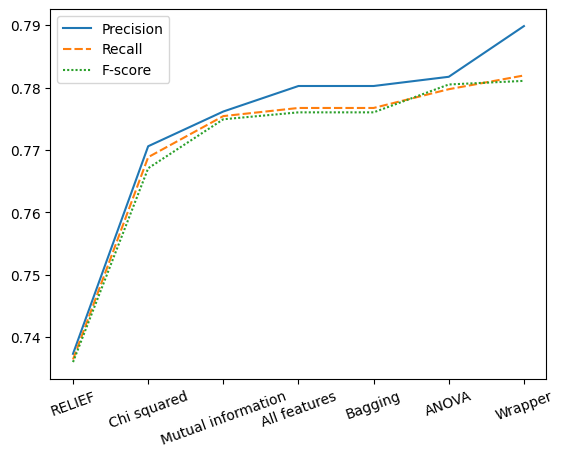

In [142]:
sns.lineplot(
    metrics_da_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_da{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Probability Distribution

In [136]:
y_test_proba_da_all = da_all.predict_proba(X_test_all)
y_test_proba_da_mi = da_mi.predict_proba(X_test_mi)
y_test_proba_da_x2 = da_x2.predict_proba(X_test_x2)
y_test_proba_da_anova = da_anova.predict_proba(X_test_anova)
y_test_proba_da_relief = da_relief.predict_proba(X_test_relief)
y_test_proba_da_wrapper = da_wrapper.predict_proba(X_test_da_wrapper)
y_test_proba_da_bagging = da_bagging.predict_proba(X_test_all)

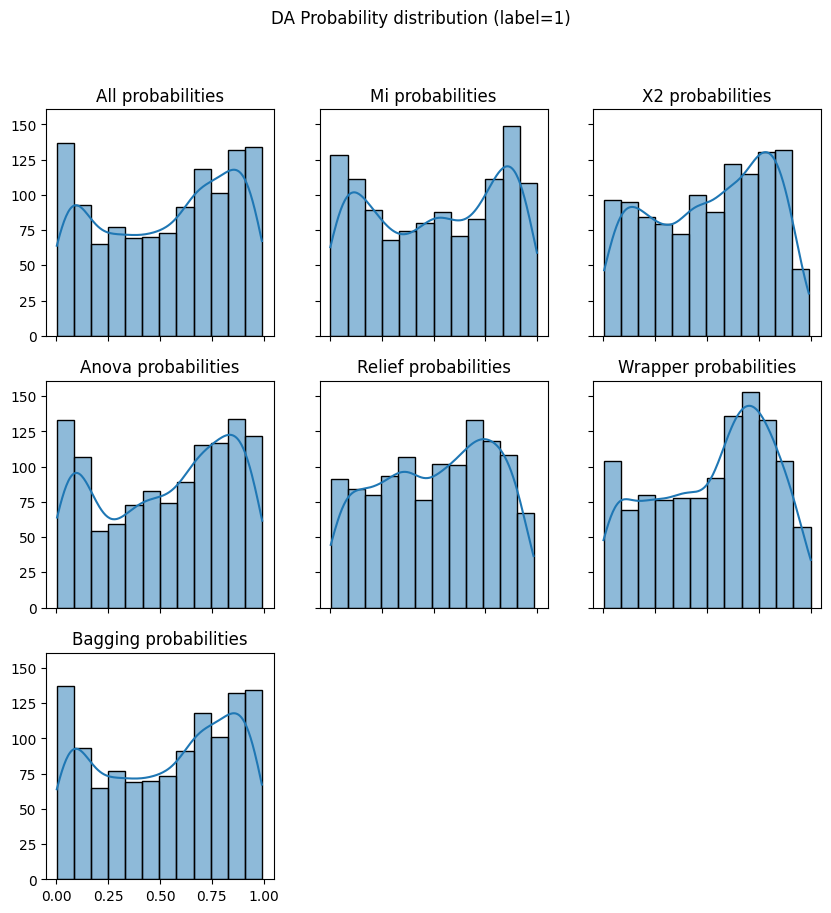

In [140]:
probabilities = [
    ('all', y_test_proba_da_all[:, 1]),
    ('mi', y_test_proba_da_mi[:, 1]),
    ('x2', y_test_proba_da_x2[:, 1]),
    ('anova', y_test_proba_da_anova[:, 1]),
    ('relief', y_test_proba_da_relief[:, 1]),
    ('wrapper', y_test_proba_da_wrapper[:, 1]),
    ('bagging', y_test_proba_da_bagging[:, 1])
]

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('DA Probability distribution (label=1)')
for i, (name, probability) in enumerate(probabilities):
    x, y = i // 3, i % 3
    sns.histplot(probability, ax=axs[x][y], kde=True)
    axs[x][y].set_title(f'{name.title()} probabilities')
    axs[x][y].set_ylabel('')
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

In [141]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'probabilities' / f'probability_da{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)